This code corresponds to the manuscript:

***"Asymmetric trichotomous partitioning overcomes dataset limitations in building machine learning models for predicting siRNA efficacy"***


### This code was developed and applied to perform:
    1) Data partitioning
    2) Model building
    3) Performance evaluation


Please cite the following manuscript when utilizing this code:

Asymmetric trichotomous data partitioning enables development of predictive machine learning models using limited siRNA efficacy datasets
Kathryn R. Monopoli, Dmitry Korkin, Anastasia Khvorova
bioRxiv 2022.07.08.499317; doi: https://doi.org/10.1101/2022.07.08.499317


**NOTE**: because of inherent randomness and small dataset size originally applied (see manuscript), when generating models, if running this code with the identical dataset the results may vary slightly. 


#### The directory setup to run these scripts is as follows:
```
trichotomous_data_partitioning_model_building
│  
│   trichotomous_data_partitioning_model_building.ipynb    
│
└───datasets
│       sirna_efficacy_data.csv
│   
└───pickled_models
│
│
└───raw_plots
```


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
pd.reset_option('all')
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import random
import os
import matplotlib
from matplotlib import pyplot as plt


In [40]:
# Load in data 
# Data avaialable from Supplementary Data Table 1 (Shmushkovich and Monopoli et al., NAR, 2018)
raw_data_file = 'KH_siRNA.csv' 
outdir_plot = 'raw_plots_original/'
outdir_model = 'pickled_models_original/'
replicate_previous_run = False # by default set to True (since some simulations take time to run this prevents re-running when unnecessary)

if replicate_previous_run:
    print('\n"replicate_previous_run" set to "True", will only re-run code if necessary\n')
else:
    print('\n"replicate_previous_run" set to "False", will FORCE all code to rerun - potentially OVERWRITING existing information\n')

    
    
if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    try:# try to get partitioned data (labeled training/testing sets) first
        df = pd.read_csv('datasets/'+raw_data_file.replace(".csv","_partitioned_K-fold.csv"))
        print("Using data that has already been partitioned into Overall Training/Holdout Sets and K-fold partitions!")

    except: # if can't find pre-partitioned data then partition it
        print("Using data that has not been partitioned into training/test set\n")
        df = pd.read_csv('datasets/'+raw_data_file)

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - data that has not been partitioned into training/test set\n")
    df = pd.read_csv('datasets/'+raw_data_file)
    

    
df.sort_values(by=['expression'],inplace=True)
df.iloc[:,1] = [i for i in df.iloc[:,1]]
df.iloc[:,1] = [i[:19] for i in df.iloc[:,1]]
df


"replicate_previous_run" set to "False", will FORCE all code to rerun - potentially OVERWRITING existing information

Forced Running NEW - data that has not been partitioned into training/test set



,ID,20mer,expression,stdev
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43
...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50


In [41]:
df

,ID,20mer,expression,stdev
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43
...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50


In [42]:
# Load in data 
# Data avaialable from Supplementary Data Table 1 (Shmushkovich and Monopoli et al., NAR, 2018)
raw_mix_file = 'Mixset.csv' 

replicate_previous_run = False # by default set to True (since some simulations take time to run this prevents re-running when unnecessary)

if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    try:# try to get partitioned data (labeled training/testing sets) first
        df_mix = pd.read_csv('datasets/'+raw_mix_file.replace(".csv","_partitioned_K-fold.csv"))
        print("Using data that has already been partitioned into Overall Training/Holdout Sets and K-fold partitions!")

    except: # if can't find pre-partitioned data then partition it
        print("Using data that has not been partitioned into training/test set\n")
        df_mix = pd.read_csv('datasets/'+raw_mix_file)

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - data that has not been partitioned into training/test set\n")
    df_mix = pd.read_csv('datasets/'+raw_mix_file)
    

    
df_mix.sort_values(by=['expression'],inplace=True)
df_mix.iloc[:,1] = [i for i in df_mix.iloc[:,1]]
display(df_mix)



Forced Running NEW - data that has not been partitioned into training/test set



,ID,19mer,expression,stdev
364,365,AUUAAGACGACUCGAAAUC,1.0,0
50,51,UGUUCUUCUGGAAGUCCAG,2.0,0
63,64,UAAGUCUUCUCCAGCUCCU,2.0,0
68,69,CAGAAUAAGUCUUCUCCAG,2.0,0
89,90,AACCACUGUAGAAAAUAAC,2.0,0
...,...,...,...,...
116,117,CGUCUUUCCGUGCUCCAAA,100.0,0
193,194,UCUUGGCCUUUAUGAGGAU,100.0,0
437,438,CUCUCCUCACCAGCACCGU,100.0,0
396,397,GCGAGAGGCGGACGGGACC,100.0,0


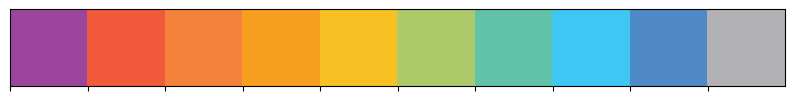

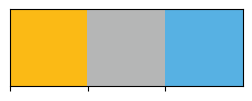

In [43]:
rainbow_color_ls = ["#9B469C","#F15A3C","#F5823A","#F89E20","#F8C022","#ADCA6B","#60C3A9","#3EC7F2","#5089C8","#B2B1B3"]
extra_purple = "#6E59A6"# for last color replacing grey in Figure 2 D
undefined_color = "#B5B6B6" # grey
func_color = "#FBBA15" # yellow 
nonfunc_color = "#57B1E3" # blue
sns.palplot(rainbow_color_ls)
sns.palplot([func_color,undefined_color,nonfunc_color])



# Select Cutoffs for Partitioning

In [44]:
df

,ID,20mer,expression,stdev
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43
...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50


In [46]:
# Devised method to split data as (relatively) evenly as possible

# Cutoff sizes of 35 and 36 distributed
co_sizes = [35,36,36,36,35,36,36,36,35,35]

ct = 0
co_range_ls = []
for co_sz in co_sizes:
    co_range_ls.append(list(df['expression'])[ct:ct+co_sz])
    ct += co_sz

if [len(x) for x in co_range_ls] != co_sizes:
    print("ERROR: sizes of cuttofs in co_range_ls do not match co_sizes")

co_ls = [x[0] for x in co_range_ls][1:]#[x[-1] for x in co_range_ls][:-1]

# NOTE: integer cutoffs just LABELS since need decimals to properly split data
co_labs = [str(int(np.round(x,0)))+"%" for x in co_ls] # New labels should be: [15, 22, 29, 36, 41, 47, 53, 65, 82]
print("Cutoffs ("+str((len(co_ls)))+" total):\n",co_ls,
      "\n\nCutoff Labels ("+str((len(co_labs)))+" total):\n",co_labs,"\n")

# Compute sizes for cutoffs
test_co_sizes = []
for i in range(len(co_ls)):
    if i >0: # subtract out previous cutoff size
        test_co_sizes.append(len(df[(df['expression'] < co_ls[i]) & (df['expression'] >= co_ls[i-1])]))

    else:
        test_co_sizes.append(len(df[df['expression'] < co_ls[i]]))
# add last part (above last cutoff)
test_co_sizes.append(len(df[df['expression'] >= co_ls[-1]]))
print("Cutoff sizes:\n",test_co_sizes)



Cutoffs (9 total):
 [15.34, 21.57, 29.2, 35.47, 40.0, 46.48, 53.2, 65.24, 82.26] 

Cutoff Labels (9 total):
 ['15%', '22%', '29%', '35%', '40%', '46%', '53%', '65%', '82%'] 

Cutoff sizes:
 [35, 36, 36, 36, 35, 36, 36, 36, 35, 35]


In [47]:
for i in range(len(co_ls)):
    indx = df[df['expression'] == co_ls[i]].index[0]
    print("cutoff:\n",co_ls[i])
    print(df.iloc[indx-2:indx+2])
    print("\n\n\n\n")
          
          

cutoff:
 15.34
      ID                20mer  expression  stdev
35  1035  GGGCUGCUUUUAACUCUGG       15.22   0.15
36  1036  CCACCAUAUGAAUUGUACA       15.34   0.89
37  1037  GAUAACCGGGAGAUAGUGA       15.41   1.14
38  1038  GAGGCGAACUGUGUGUGAG       16.06   1.80





cutoff:
 21.57
      ID                20mer  expression  stdev
69  1069  UUGACAAGGAUGGAUGGCU       21.29   1.03
70  1070  GACAAAUACGAUUUAUCUA       21.44   2.36
71  1071  UAUAUAUAUUUUAAUUUGA       21.57   0.38
72  1072  AUUGUACAGAAUAUUUCUA       21.63   2.94





cutoff:
 29.2
       ID                20mer  expression  stdev
105  1105  GGGUGUGAACCAUGAGAAG       28.58   0.86
106  1106  UGUUGGUGGAUGAGCAAGA       28.61   3.52
107  1107  UUAACUCUGGUAAAGUGGA       29.20   0.42
108  1108  CGAUAACCGGGAGAUAGUG       29.30   1.61





cutoff:
 35.47
       ID                20mer  expression  stdev
141  1141  CCUUCGAUAGGGACAAGAC       35.30   2.01
142  1142  CAAUGACCCCUUCAUUGAC       35.31   1.52
143  1143  CUGGAACAAUUGCUUUUAC      

In [48]:
df

,ID,20mer,expression,stdev
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43
...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50


# Select Thresholds for Partitioning

In [49]:
# consider every possible (non-overlapping) threshold combination
co_combos = [] 
co_combos_labs = [] 
colname_ls = df.columns[4:]
for i in range(len(co_ls)):
    for j in range(len(co_ls)):
        if co_ls[i] <= co_ls[j]:
            co_combos.append([co_ls[i], co_ls[j]])
            co_combos_labs.append([co_labs[i],co_labs[j]])
print(len(co_combos),"threshold combinations:\n",co_combos)
print("\n\n",len(co_combos_labs),"threshold combinations:\n",co_combos_labs)


45 threshold combinations:
 [[15.34, 15.34], [15.34, 21.57], [15.34, 29.2], [15.34, 35.47], [15.34, 40.0], [15.34, 46.48], [15.34, 53.2], [15.34, 65.24], [15.34, 82.26], [21.57, 21.57], [21.57, 29.2], [21.57, 35.47], [21.57, 40.0], [21.57, 46.48], [21.57, 53.2], [21.57, 65.24], [21.57, 82.26], [29.2, 29.2], [29.2, 35.47], [29.2, 40.0], [29.2, 46.48], [29.2, 53.2], [29.2, 65.24], [29.2, 82.26], [35.47, 35.47], [35.47, 40.0], [35.47, 46.48], [35.47, 53.2], [35.47, 65.24], [35.47, 82.26], [40.0, 40.0], [40.0, 46.48], [40.0, 53.2], [40.0, 65.24], [40.0, 82.26], [46.48, 46.48], [46.48, 53.2], [46.48, 65.24], [46.48, 82.26], [53.2, 53.2], [53.2, 65.24], [53.2, 82.26], [65.24, 65.24], [65.24, 82.26], [82.26, 82.26]]


 45 threshold combinations:
 [['15%', '15%'], ['15%', '22%'], ['15%', '29%'], ['15%', '35%'], ['15%', '40%'], ['15%', '46%'], ['15%', '53%'], ['15%', '65%'], ['15%', '82%'], ['22%', '22%'], ['22%', '29%'], ['22%', '35%'], ['22%', '40%'], ['22%', '46%'], ['22%', '53%'], ['22%', '

# Data Partitioning into Training/Holdout

### Huesken

In [50]:
# Split data into Overall Training Set (75%) and Overall Holdout Set (25%)
#    For EACH threshold combination, Partition Data Randomly into Training and Holdout Sets

training_set_size = 0.75 
holdout_set_size = 0.25

if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    if 'f_co_'+co_combos_labs[0][0]+'__nf_co_'+co_combos_labs[0][1]+'_class' not in df.columns: 
        # data have NOT been partitioned into Overall Training/Overall Holdout yet
        print("Partitioning data into Overall Training/Holdout Sets")
        
        # need to classify data for each threshold combo so that equally distribute efficient/inefficient siRNAs into Training/Holdout sets
        colname_ls = []
        for i in range(len(co_combos)):
            f_co = co_combos[i][0]
            nf_co = co_combos[i][1]

            # make 2 empty columns for given cutoff combo: 1) partition (train/test), 2) class (efficient/inefficient/undefined)
            colname = 'f_co_'+co_combos_labs[i][0]+'__nf_co_'+co_combos_labs[i][1]
            df[colname+'_class'] = np.nan
            df[colname+'_partition'] = np.nan
            colname_ls.append(colname)

            # classify (efficient/inefficient/undefined) by cutoff combo
            df.loc[df['expression']<f_co,colname+'_class'] = 'efficient'
            df.loc[df['expression']>=nf_co,colname+'_class'] = 'inefficient'
            df.loc[((df['expression']>=f_co) & (df['expression']<nf_co)),colname+'_class'] = 'undefined'

            # indicies of all efficient siRNAs
            random_pos_train = random.sample( list(df.index) , int(len(list(df.index))*training_set_size) )
            random_pos_holdout = [x for x in range(0, len(df)) if x not in random_pos_train]

            random_pos_train.sort()
            random_pos_holdout.sort()

            df.loc[random_pos_train,colname+'_partition'] = 'training'
            df.loc[random_pos_holdout,colname+'_partition'] = 'training'




        # export partitioned data to a file
        fnm='datasets/'+raw_data_file.replace(".csv","_partitioned.csv")
        df_mix.to_csv(fnm,index=False)
        print("Data saved to:\n",fnm)


    else:
        # data have ALREADY been partitioned into Overall Training/Overall Holdout 
        print("Data are already partitioned into Overall Training/Holdout Sets")
        colname_ls = [x.replace("_partition",'') for x in list(df_mix.columns) if (  'partition' in x)]

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - partitioning into Overall Training and Overall Holdout Sets")
    
    # need to classify data for each threshold combo so that equally distribute efficient/inefficient siRNAs into Training/Holdout sets
    colname_ls = []
    for i in range(len(co_combos)):
        f_co = co_combos[i][0]
        nf_co = co_combos[i][1]

        # make 2 empty columns for given cutoff combo: 1) partition (train/test), 2) class (efficient/inefficient/undefined)
        colname = 'f_co_'+co_combos_labs[i][0]+'__nf_co_'+co_combos_labs[i][1]
        df[colname+'_class'] = np.nan
        df[colname+'_partition'] = np.nan
        colname_ls.append(colname)

        # classify (efficient/inefficient/undefined) by cutoff combo
        df.loc[df['expression']<f_co,colname+'_class'] = 'efficient'
        df.loc[df['expression']>=nf_co,colname+'_class'] = 'inefficient'
        df.loc[((df['expression']>=f_co) & (df['expression']<nf_co)),colname+'_class'] = 'undefined'

        # indicies of all efficient siRNAs
        random_pos_train = random.sample( list(df.index) , int(len(list(df.index))*training_set_size) )
        random_pos_holdout = [x for x in range(0, len(df)) if x not in random_pos_train]

        random_pos_train.sort()
        random_pos_holdout.sort()

        df.loc[random_pos_train,colname+'_partition'] = 'training'
        df.loc[random_pos_holdout,colname+'_partition'] = 'training'



    # export partitioned data to a file
    fnm='datasets/'+raw_mix_file.replace(".csv","_partitioned.csv")
    df.to_csv(fnm,index=False)
    print("Data saved to:\n",fnm)




Forced Running NEW - partitioning into Overall Training and Overall Holdout Sets
Data saved to:
 datasets/Mixset_partitioned.csv


### Mixset

In [51]:
# Split data into Overall Training Set (75%) and Overall Holdout Set (25%)
#    For EACH threshold combination, Partition Data Randomly into Training and Holdout Sets

training_set_size = 0.75 
holdout_set_size = 0.25

if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    if 'f_co_'+co_combos_labs[0][0]+'__nf_co_'+co_combos_labs[0][1]+'_class' not in df_mix.columns: 
        # data have NOT been partitioned into Overall Training/Overall Holdout yet
        print("Partitioning data into Overall Training/Holdout Sets")
        
        # need to classify data for each threshold combo so that equally distribute efficient/inefficient siRNAs into Training/Holdout sets
        colname_ls = []
        for i in range(len(co_combos)):
            f_co = co_combos[i][0]
            nf_co = co_combos[i][1]

            # make 2 empty columns for given cutoff combo: 1) partition (train/test), 2) class (efficient/inefficient/undefined)
            colname = 'f_co_'+co_combos_labs[i][0]+'__nf_co_'+co_combos_labs[i][1]
            df_mix[colname+'_class'] = np.nan
            df_mix[colname+'_partition'] = np.nan
            colname_ls.append(colname)

            # classify (efficient/inefficient/undefined) by cutoff combo
            df_mix.loc[df_mix['expression']<f_co,colname+'_class'] = 'efficient'
            df_mix.loc[df_mix['expression']>=nf_co,colname+'_class'] = 'inefficient'
            df_mix.loc[((df_mix['expression']>=f_co) & (df_mix['expression']<nf_co)),colname+'_class'] = 'undefined'

            # indicies of all efficient siRNAs
            random_pos_train = random.sample( list(df_mix.index) , int(len(list(df_mix.index))*training_set_size) )
            random_pos_holdout = [x for x in range(0, len(df_mix)) if x not in random_pos_train]

            random_pos_train.sort()
            random_pos_holdout.sort()

            df_mix.loc[random_pos_train,colname+'_partition'] = 'training'
            df_mix.loc[random_pos_holdout,colname+'_partition'] = 'training'




        # export partitioned data to a file
        fnm='datasets/'+raw_data_file.replace(".csv","_partitioned.csv")
        df_mix.to_csv(fnm,index=False)
        print("Data saved to:\n",fnm)


    else:
        # data have ALREADY been partitioned into Overall Training/Overall Holdout 
        print("Data are already partitioned into Overall Training/Holdout Sets")
        colname_ls = [x.replace("_partition",'') for x in list(df_mix.columns) if (  'partition' in x)]

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - partitioning into Overall Training and Overall Holdout Sets")
    
    # need to classify data for each threshold combo so that equally distribute efficient/inefficient siRNAs into Training/Holdout sets
    colname_ls = []
    for i in range(len(co_combos)):
        f_co = co_combos[i][0]
        nf_co = co_combos[i][1]

        # make 2 empty columns for given cutoff combo: 1) partition (train/test), 2) class (efficient/inefficient/undefined)
        colname = 'f_co_'+co_combos_labs[i][0]+'__nf_co_'+co_combos_labs[i][1]
        df_mix[colname+'_class'] = np.nan
        df_mix[colname+'_partition'] = np.nan
        colname_ls.append(colname)

        # classify (efficient/inefficient/undefined) by cutoff combo
        df_mix.loc[df_mix['expression']<f_co,colname+'_class'] = 'efficient'
        df_mix.loc[df_mix['expression']>=nf_co,colname+'_class'] = 'inefficient'
        df_mix.loc[((df_mix['expression']>=f_co) & (df_mix['expression']<nf_co)),colname+'_class'] = 'undefined'

        # indicies of all efficient siRNAs
        random_pos_train = random.sample( list(df_mix.index) , int(len(list(df_mix.index))*training_set_size) )
        random_pos_holdout = [x for x in range(0, len(df_mix)) if x not in random_pos_train]

        random_pos_train.sort()
        random_pos_holdout.sort()

        df_mix.loc[random_pos_train,colname+'_partition'] = 'training'
        df_mix.loc[random_pos_holdout,colname+'_partition'] = 'training'



    # export partitioned data to a file
    fnm='datasets/'+raw_mix_file.replace(".csv","_partitioned.csv")
    df_mix.to_csv(fnm,index=False)
    print("Data saved to:\n",fnm)




Forced Running NEW - partitioning into Overall Training and Overall Holdout Sets
Data saved to:
 datasets/Mixset_partitioned.csv


# Divide each training set partition group into K (10) folds 
## and save results to file so repeatable

### Huesken

In [52]:
if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    if 'f_co_'+co_combos_labs[0][0]+'__nf_co_'+co_combos_labs[0][1]+'_K-part' not in df.columns:
        print("Making K-fold partions")
        for col in colname_ls:
            print()
            # get indicies of all training data for given threshold combo
            training_indxs = list(df[df[col+'_partition']=='training'].index)
            holdout_indxs = list(df[df[col+"_partition"]=='holdout'].index)
            # randomly partition training data for given partition into K (10) groups
            # shuffle indicies
            random.shuffle(training_indxs)
            # split indicies by 10's
            k_part_size_1 = int(len(training_indxs)/10)
            remaining_to_distribute = len(training_indxs)%10

            k_partitions = [training_indxs[i::10] for i in range(10)]
            print([len(x) for x in k_partitions])
            print(k_partitions)
            print("\n\nItems in k_fold_partitions are unique:",len(([x for x_s in k_partitions for x in x_s])) == len(set([x for x_s in k_partitions for x in x_s])),"\n\n")



            # add column in df to indicate which k_part training data are in (so repeatable)
            df[col+"_K-part"] = np.nan
            for i in range(len(k_partitions)):
                df.loc[k_partitions[i]]
                df.loc[k_partitions[i],col+"_K-part"] = i+1
            df.loc[holdout_indxs,col+"_K-part"] = 'N/A (holdout)'


        # export K-fold partitioned data to a file
        fnm='datasets/'+raw_data_file.replace(".csv","_partitioned_K-fold.csv")
        df.to_csv(fnm,index=False)
        print("Data saved to:\n",fnm)
        
    else:
        print("K-fold partitions already created!")

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - making K-fold partitions")
    for col in colname_ls:
        print()
        # get indicies of all training data for given threshold combo
        training_indxs = list(df[df[col+'_partition']=='training'].index)
        holdout_indxs = list(df[df[col+"_partition"]=='holdout'].index)
        # randomly partition training data for given partition into K (10) groups
        # shuffle indicies
        random.shuffle(training_indxs)
        # split indicies by 10's
        k_part_size_1 = int(len(training_indxs)/10)
        remaining_to_distribute = len(training_indxs)%10

        k_partitions = [training_indxs[i::10] for i in range(10)]
        print([len(x) for x in k_partitions])
        print(k_partitions)
        print("\n\nItems in k_fold_partitions are unique:",len(([x for x_s in k_partitions for x in x_s])) == len(set([x for x_s in k_partitions for x in x_s])),"\n\n")



        # add column in df to indicate which k_part training data are in (so repeatable)
        df[col+"_K-part"] = np.nan
        for i in range(len(k_partitions)):
            df.loc[k_partitions[i]]
            df.loc[k_partitions[i],col+"_K-part"] = i+1
        df.loc[holdout_indxs,col+"_K-part"] = 'N/A (holdout)'


    # export K-fold partitioned data to a file
    fnm='datasets/'+raw_data_file.replace(".csv","_partitioned_K-fold.csv")
    df.to_csv(fnm,index=False)
    print("Data saved to:\n",fnm)

    
    
    

Forced Running NEW - making K-fold partitions

[36, 36, 36, 36, 36, 36, 35, 35, 35, 35]
[[16, 222, 189, 42, 287, 297, 272, 319, 320, 27, 353, 301, 74, 207, 239, 85, 141, 174, 269, 193, 86, 260, 354, 115, 12, 316, 41, 44, 11, 114, 59, 278, 224, 136, 123, 77], [253, 61, 339, 312, 285, 125, 229, 234, 75, 30, 299, 335, 82, 252, 244, 247, 97, 147, 330, 266, 106, 131, 257, 148, 336, 352, 314, 235, 206, 25, 186, 14, 104, 205, 62, 87], [151, 68, 156, 9, 300, 258, 109, 197, 10, 238, 270, 65, 215, 149, 345, 26, 237, 50, 190, 288, 15, 223, 182, 255, 249, 57, 322, 110, 94, 329, 160, 290, 282, 143, 228, 53], [138, 230, 281, 306, 80, 72, 88, 292, 70, 302, 192, 303, 254, 51, 219, 246, 334, 54, 284, 95, 29, 155, 145, 265, 35, 259, 248, 218, 91, 64, 274, 7, 241, 39, 66, 187], [355, 90, 101, 327, 280, 242, 32, 140, 194, 31, 350, 298, 120, 24, 180, 332, 338, 210, 341, 19, 315, 231, 196, 331, 1, 227, 23, 236, 36, 317, 342, 261, 43, 154, 348, 307], [100, 243, 225, 165, 226, 20, 98, 209, 78, 256, 127, 324, 

### Mixset

In [53]:
if (replicate_previous_run == True): 
    # by default don't rerun unless have to 
    if 'f_co_'+co_combos_labs[0][0]+'__nf_co_'+co_combos_labs[0][1]+'_K-part' not in df_mix.columns:
        print("Making K-fold partions")
        for col in colname_ls:
            print()
            # get indicies of all training data for given threshold combo
            training_indxs = list(df_mix[df_mix[col+'_partition']=='training'].index)
            holdout_indxs = list(df_mix[df_mix[col+"_partition"]=='holdout'].index)
            # randomly partition training data for given partition into K (10) groups
            # shuffle indicies
            random.shuffle(training_indxs)
            # split indicies by 10's
            k_part_size_1 = int(len(training_indxs)/10)
            remaining_to_distribute = len(training_indxs)%10

            k_partitions = [training_indxs[i::10] for i in range(10)]
            print([len(x) for x in k_partitions])
            print(k_partitions)
            print("\n\nItems in k_fold_partitions are unique:",len(([x for x_s in k_partitions for x in x_s])) == len(set([x for x_s in k_partitions for x in x_s])),"\n\n")



            # add column in df to indicate which k_part training data are in (so repeatable)
            df_mix[col+"_K-part"] = np.nan
            for i in range(len(k_partitions)):
                df_mix.loc[k_partitions[i]]
                df_mix.loc[k_partitions[i],col+"_K-part"] = i+1
            df_mix.loc[holdout_indxs,col+"_K-part"] = 'N/A (holdout)'


        # export K-fold partitioned data to a file
        fnm='datasets/'+raw_data_file.replace(".csv","_partitioned_K-fold.csv")
        df_mix.to_csv(fnm,index=False)
        print("Data saved to:\n",fnm)
        
    else:
        print("K-fold partitions already created!")

else: 
    # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
    print("Forced Running NEW - making K-fold partitions")
    for col in colname_ls:
        print()
        # get indicies of all training data for given threshold combo
        training_indxs = list(df_mix[df_mix[col+'_partition']=='training'].index)
        holdout_indxs = list(df_mix[df_mix[col+"_partition"]=='holdout'].index)
        # randomly partition training data for given partition into K (10) groups
        # shuffle indicies
        random.shuffle(training_indxs)
        # split indicies by 10's
        k_part_size_1 = int(len(training_indxs)/10)
        remaining_to_distribute = len(training_indxs)%10

        k_partitions = [training_indxs[i::10] for i in range(10)]
        print([len(x) for x in k_partitions])
        print(k_partitions)
        print("\n\nItems in k_fold_partitions are unique:",len(([x for x_s in k_partitions for x in x_s])) == len(set([x for x_s in k_partitions for x in x_s])),"\n\n")



        # add column in df to indicate which k_part training data are in (so repeatable)
        df_mix[col+"_K-part"] = np.nan
        for i in range(len(k_partitions)):
            df_mix.loc[k_partitions[i]]
            df_mix.loc[k_partitions[i],col+"_K-part"] = i+1
        df_mix.loc[holdout_indxs,col+"_K-part"] = 'N/A (holdout)'


    # export K-fold partitioned data to a file
    fnm='datasets/'+raw_data_file.replace(".csv","_partitioned_K-fold.csv")
    df_mix.to_csv(fnm,index=False)
    print("Data saved to:\n",fnm)

    
    
    

Forced Running NEW - making K-fold partitions

[48, 48, 47, 47, 47, 47, 47, 47, 47, 47]
[[298, 289, 442, 68, 383, 121, 293, 63, 56, 367, 115, 426, 389, 358, 225, 128, 272, 250, 331, 338, 316, 155, 402, 455, 173, 296, 35, 404, 163, 459, 429, 424, 234, 1, 248, 150, 423, 342, 300, 32, 33, 320, 243, 125, 114, 61, 5, 98], [256, 85, 16, 432, 247, 333, 276, 62, 195, 422, 434, 317, 461, 129, 74, 343, 190, 6, 267, 463, 239, 213, 69, 322, 430, 329, 375, 204, 161, 440, 443, 387, 188, 262, 356, 427, 166, 67, 97, 306, 182, 221, 220, 310, 274, 4, 94, 93], [180, 228, 304, 45, 226, 170, 301, 362, 215, 26, 189, 450, 159, 70, 111, 444, 133, 454, 14, 311, 57, 309, 241, 151, 265, 109, 46, 348, 439, 337, 131, 411, 447, 445, 390, 244, 8, 200, 24, 119, 80, 280, 453, 38, 458, 406, 268], [15, 398, 431, 231, 470, 394, 364, 359, 37, 203, 271, 441, 266, 344, 2, 76, 79, 371, 43, 224, 281, 407, 457, 397, 366, 71, 168, 25, 19, 421, 59, 148, 460, 137, 214, 292, 399, 53, 468, 327, 400, 466, 374, 334, 30, 177, 297], [9

In [54]:
df_mix

,ID,19mer,expression,stdev,f_co_15%__nf_co_15%_class,f_co_15%__nf_co_15%_partition,f_co_15%__nf_co_22%_class,f_co_15%__nf_co_22%_partition,f_co_15%__nf_co_29%_class,f_co_15%__nf_co_29%_partition,...,f_co_46%__nf_co_46%_K-part,f_co_46%__nf_co_53%_K-part,f_co_46%__nf_co_65%_K-part,f_co_46%__nf_co_82%_K-part,f_co_53%__nf_co_53%_K-part,f_co_53%__nf_co_65%_K-part,f_co_53%__nf_co_82%_K-part,f_co_65%__nf_co_65%_K-part,f_co_65%__nf_co_82%_K-part,f_co_82%__nf_co_82%_K-part
364,365,AUUAAGACGACUCGAAAUC,1.0,0,efficient,training,efficient,training,efficient,training,...,7.0,4.0,8.0,7.0,9.0,7.0,3.0,4.0,4.0,9.0
50,51,UGUUCUUCUGGAAGUCCAG,2.0,0,efficient,training,efficient,training,efficient,training,...,10.0,5.0,3.0,3.0,6.0,10.0,9.0,10.0,3.0,4.0
63,64,UAAGUCUUCUCCAGCUCCU,2.0,0,efficient,training,efficient,training,efficient,training,...,3.0,7.0,8.0,6.0,3.0,3.0,6.0,4.0,3.0,6.0
68,69,CAGAAUAAGUCUUCUCCAG,2.0,0,efficient,training,efficient,training,efficient,training,...,4.0,6.0,6.0,2.0,1.0,7.0,2.0,3.0,7.0,10.0
89,90,AACCACUGUAGAAAAUAAC,2.0,0,efficient,training,efficient,training,efficient,training,...,7.0,3.0,7.0,10.0,4.0,9.0,9.0,2.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,CGUCUUUCCGUGCUCCAAA,100.0,0,inefficient,training,inefficient,training,inefficient,training,...,4.0,10.0,8.0,4.0,4.0,5.0,4.0,4.0,6.0,5.0
193,194,UCUUGGCCUUUAUGAGGAU,100.0,0,inefficient,training,inefficient,training,inefficient,training,...,8.0,10.0,5.0,9.0,8.0,3.0,5.0,4.0,2.0,1.0
437,438,CUCUCCUCACCAGCACCGU,100.0,0,inefficient,training,inefficient,training,inefficient,training,...,7.0,2.0,5.0,5.0,9.0,1.0,10.0,5.0,5.0,1.0
396,397,GCGAGAGGCGGACGGGACC,100.0,0,inefficient,training,inefficient,training,inefficient,training,...,8.0,7.0,9.0,3.0,3.0,8.0,8.0,10.0,10.0,5.0


In [55]:
df

,ID,20mer,expression,stdev,f_co_15%__nf_co_15%_class,f_co_15%__nf_co_15%_partition,f_co_15%__nf_co_22%_class,f_co_15%__nf_co_22%_partition,f_co_15%__nf_co_29%_class,f_co_15%__nf_co_29%_partition,...,f_co_46%__nf_co_46%_K-part,f_co_46%__nf_co_53%_K-part,f_co_46%__nf_co_65%_K-part,f_co_46%__nf_co_82%_K-part,f_co_53%__nf_co_53%_K-part,f_co_53%__nf_co_65%_K-part,f_co_53%__nf_co_82%_K-part,f_co_65%__nf_co_65%_K-part,f_co_65%__nf_co_82%_K-part,f_co_82%__nf_co_82%_K-part
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25,efficient,training,efficient,training,efficient,training,...,9.0,2.0,6.0,9.0,4.0,5.0,7.0,8.0,1.0,6.0
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37,efficient,training,efficient,training,efficient,training,...,2.0,9.0,1.0,3.0,6.0,9.0,5.0,3.0,2.0,5.0
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08,efficient,training,efficient,training,efficient,training,...,7.0,3.0,5.0,4.0,8.0,8.0,5.0,8.0,8.0,4.0
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31,efficient,training,efficient,training,efficient,training,...,4.0,9.0,6.0,2.0,7.0,5.0,4.0,2.0,1.0,2.0
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43,efficient,training,efficient,training,efficient,training,...,9.0,9.0,2.0,3.0,7.0,8.0,2.0,7.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64,inefficient,training,inefficient,training,inefficient,training,...,1.0,4.0,4.0,10.0,8.0,3.0,8.0,3.0,2.0,3.0
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13,inefficient,training,inefficient,training,inefficient,training,...,1.0,7.0,10.0,4.0,6.0,7.0,7.0,6.0,2.0,8.0
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88,inefficient,training,inefficient,training,inefficient,training,...,9.0,4.0,9.0,9.0,4.0,4.0,4.0,4.0,5.0,10.0
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50,inefficient,training,inefficient,training,inefficient,training,...,9.0,9.0,3.0,6.0,8.0,9.0,6.0,6.0,10.0,8.0


In [56]:
df['f_co_29%__nf_co_29%_K-part'].value_counts()

f_co_29%__nf_co_29%_K-part
4.0     36
5.0     36
3.0     36
1.0     36
6.0     36
2.0     36
10.0    35
7.0     35
8.0     35
9.0     35
Name: count, dtype: int64

In [57]:
df['f_co_29%__nf_co_29%_partition'].value_counts()

f_co_29%__nf_co_29%_partition
training    356
Name: count, dtype: int64

#### Determining if have correct number of groups of data:
* have 45 threshold combinations:
    * 1 overall training set (75% of data  ~267 siRNAs)
    * 1 overall holdout  set (25% of data  ~89 siRNAs)

* k = 10 subsets
* then should have:
    * 45 overall holdout sets
    * 45 * k = 45 * 10 = 450 training sets (each with 9 training subsets and 1 test subset)
    * 450 + 45 = 495 so should have **495 groups of data**


In [58]:
nm_k_temp = len([x for x in list(df['f_co_29%__nf_co_29%_K-part'].value_counts().index) if x != 'N/A (holdout)']) # number of k-partitions
nm_col_k_part_temp =len([ x for x in df.columns if 'K-part' in x]) # number of of columns containing K-partition information 
nm_hldout_temp = len([ x for x in df.columns if '_partition' in x]) # number of holdout set groups

print("This values should equal 495:\n",(nm_k_temp*nm_col_k_part_temp)+ nm_hldout_temp) # should equal 495




This values should equal 495:
 495


# Plot cutoff combinations
**NOTE**: plots ALL 45 cutoff combinations in a grid for both Training and Holdout sets so ***may take a few minutes to run if running locally***

order of plots:
training
holdout


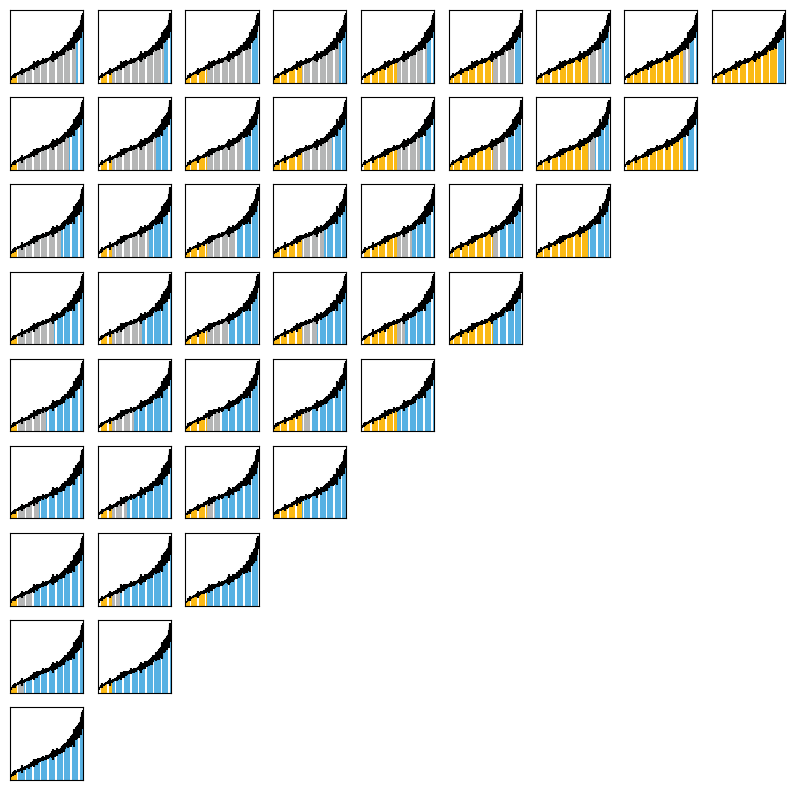

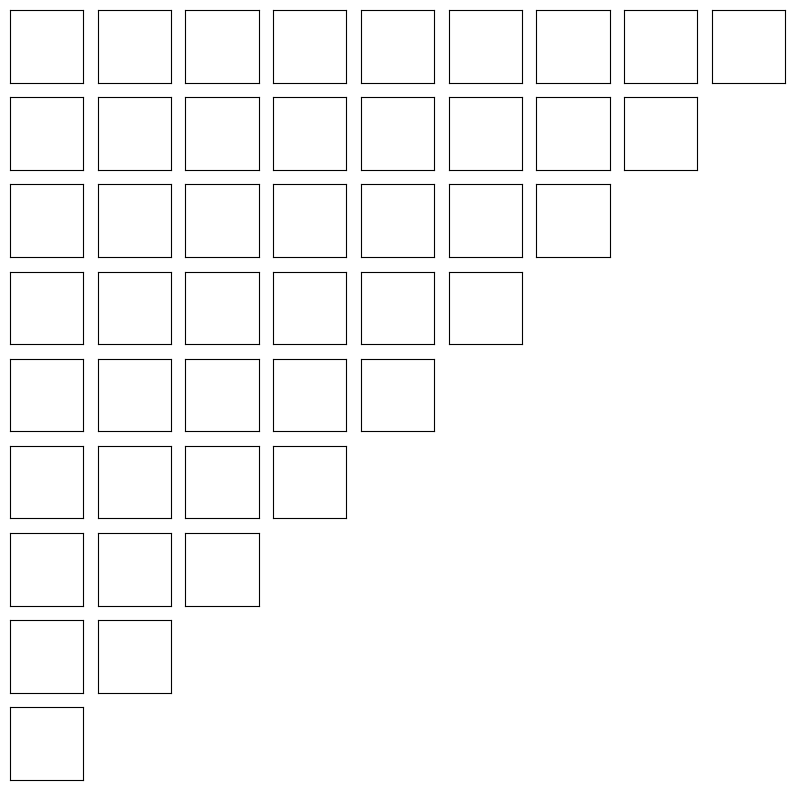

In [59]:
# Plot data - cutoff combinations as a grid
#    Plot Overall Training and Holdout Sets separately

colname_ls
co_combos


fig1, axs1 = plt.subplots(9,9)
fig1.set_size_inches(w=10, h=10)

fig2, axs2 = plt.subplots(9,9)
fig2.set_size_inches(w=10, h=10)

eff_co_lab_simp_ls =   [x.replace("%","") for x in co_labs]
ineff_co_lab_simp_ls = [x.replace("%","") for x in co_labs][::-1]
print("order of plots:")
# plots SEPARATELY overall training (75%) and overall test (25%) sets
for p in ['training','holdout']: # plot the training and holdout separately!
    print(p)
    for i in range(9):
        for j in range(9):
            # select axis to plot
            if p == 'training':
                ax = axs1[i,j] #ax = axs[i,j]
            else:
                ax = axs2[i,j] #ax = axs[i,j]
                
            # if axis belongs to overlapping threshold combination, remove it
            if i+j>8:
                ax.remove()
            else:
                f_co = eff_co_lab_simp_ls[j]
                nf_co = ineff_co_lab_simp_ls[i]

                #ax.text(1,7,s="( i:"+str(i)+", j:"+str(j)+")")
                #ax.text(0,3,s=('f_co_'+str(eff_co_lab_simp_ls[j])+'%__nf_co_'+str(ineff_co_lab_simp_ls[i])+'%_class'))


                threshold_lab_temp='f_co_'+str(f_co)+'%__nf_co_'+str(nf_co)+'%_class'

                color_ls = (
                    # 'f_co_29%__nf_co_29%_partition' cutoff combination has no undefined data and therefore will have all info about partitioning 
                    ['#FBBA15']*len(df[(df[threshold_lab_temp] == 'efficient') & (df['f_co_29%__nf_co_29%_partition'] == p)])+
                    ['#B5B6B6']*len(df[(df[threshold_lab_temp] == 'undefined') & (df['f_co_29%__nf_co_29%_partition'] == p)])+
                    ['#57B1E3']*len(df[(df[threshold_lab_temp] == 'inefficient') & (df['f_co_29%__nf_co_29%_partition'] == p)]))
                

                # plot expression data (NOTE: the data itself stays the same for each cutoff, just the coloring of efficient/undefined/inefficient changes)
                rects = ax.bar(
                    # 'f_co_29%__nf_co_29%_partition' cutoff combination has no undefined data and therefore will have all info about partitioning 
                    x = range(len(df[df['f_co_29%__nf_co_29%_partition'] == p])),#range(len(df.loc[random_pos_train])),
                    height=df[df['f_co_29%__nf_co_29%_partition'] == p]['expression'],#df.loc[random_pos_train]['expression'],
                    yerr=df[df['f_co_29%__nf_co_29%_partition'] == p]['stdev'],#df.loc[random_pos_train]['stdev'],
                    color = color_ls,
                )

                # ** FORMAT AXES **
                # Set axes to start/end where desired
                ax.set_xlim(0,len(df[df['f_co_29%__nf_co_29%_partition'] == p]))# len(0,df.loc[random_pos_train])
                ax.set_ylim(0,np.round(max(df['expression']))+10)
                # Remove x-axis ticks
                ax.set_xticks([])
                # Remove y-axis ticks
                ax.set_yticks([])
                # Change x-axis tick labels (and rotate)
                # ax.set_xticklabels(['t'+str(x) for x in range(21)[1:]], rotation=0)
                # Add horizontal line cross at 0
                # ax.axhline(y=0, xmin=0, xmax=1, color='black', lw=1)
                # # Change both x and y axis label font size
                # ax.tick_params(labelsize=10)



plt.show()



# Prep data for model training
#### Exclude undefined values from Training and Holdout sets

In [60]:
colname_ls

['f_co_15%__nf_co_15%',
 'f_co_15%__nf_co_22%',
 'f_co_15%__nf_co_29%',
 'f_co_15%__nf_co_35%',
 'f_co_15%__nf_co_40%',
 'f_co_15%__nf_co_46%',
 'f_co_15%__nf_co_53%',
 'f_co_15%__nf_co_65%',
 'f_co_15%__nf_co_82%',
 'f_co_22%__nf_co_22%',
 'f_co_22%__nf_co_29%',
 'f_co_22%__nf_co_35%',
 'f_co_22%__nf_co_40%',
 'f_co_22%__nf_co_46%',
 'f_co_22%__nf_co_53%',
 'f_co_22%__nf_co_65%',
 'f_co_22%__nf_co_82%',
 'f_co_29%__nf_co_29%',
 'f_co_29%__nf_co_35%',
 'f_co_29%__nf_co_40%',
 'f_co_29%__nf_co_46%',
 'f_co_29%__nf_co_53%',
 'f_co_29%__nf_co_65%',
 'f_co_29%__nf_co_82%',
 'f_co_35%__nf_co_35%',
 'f_co_35%__nf_co_40%',
 'f_co_35%__nf_co_46%',
 'f_co_35%__nf_co_53%',
 'f_co_35%__nf_co_65%',
 'f_co_35%__nf_co_82%',
 'f_co_40%__nf_co_40%',
 'f_co_40%__nf_co_46%',
 'f_co_40%__nf_co_53%',
 'f_co_40%__nf_co_65%',
 'f_co_40%__nf_co_82%',
 'f_co_46%__nf_co_46%',
 'f_co_46%__nf_co_53%',
 'f_co_46%__nf_co_65%',
 'f_co_46%__nf_co_82%',
 'f_co_53%__nf_co_53%',
 'f_co_53%__nf_co_65%',
 'f_co_53%__nf_c

In [61]:
# Update all undefined sequences in the holdout dataset to "excluded"
for colname in colname_ls:
    indicies_holdout_undef = list(df[(df[colname+'_class'] == 'undefined') & (df[colname+'_partition'] == 'holdout')].index)
    df.loc[indicies_holdout_undef , colname+'_class'] = 'excluded'   # note use comma "," to select column when updating values     

# Update all undefined sequences in the training dataset to "excluded" 
for colname in colname_ls:
    indicies_training_undef = list(df[(df[colname+'_class'] == 'undefined') & (df[colname+'_partition'] == 'training')].index)
    df.loc[indicies_training_undef , colname+'_class'] = 'excluded'   # note use comma "," to select column when updating values     

# NOTE: 'f_co_15%__nf_co_82%_partition' cutoff combination is just selected as an example for testing because it contains undefined (middle) values
df[df['f_co_29%__nf_co_29%_partition'] == 'training']['f_co_29%__nf_co_29%_class'].value_counts()




f_co_29%__nf_co_29%_class
inefficient    249
efficient      107
Name: count, dtype: int64

In [62]:
# Update all undefined sequences in the holdout dataset to "excluded"
for colname in colname_ls:
    indicies_holdout_undef = list(df_mix[(df_mix[colname+'_class'] == 'undefined') & (df_mix[colname+'_partition'] == 'holdout')].index)
    df_mix.loc[indicies_holdout_undef , colname+'_class'] = 'excluded'   # note use comma "," to select column when updating values     

# Update all undefined sequences in the training dataset to "excluded" 
for colname in colname_ls:
    indicies_training_undef = list(df_mix[(df_mix[colname+'_class'] == 'undefined') & (df_mix[colname+'_partition'] == 'training')].index)
    df_mix.loc[indicies_training_undef , colname+'_class'] = 'excluded'   # note use comma "," to select column when updating values     

# NOTE: 'f_co_15%__nf_co_82%_partition' cutoff combination is just selected as an example for testing because it contains undefined (middle) values
df_mix[df_mix['f_co_29%__nf_co_29%_partition'] == 'training']['f_co_29%__nf_co_29%_class'].value_counts()




f_co_29%__nf_co_29%_class
inefficient    237
efficient      235
Name: count, dtype: int64

In [25]:
# NOTE: 'f_co_15%__nf_co_82%_partition' cutoff combination is just selected as an example for testing because it contains undefined (middle) values
print(df[df['f_co_29%__nf_co_29%_partition'] == 'holdout']['f_co_29%__nf_co_29%_class'].value_counts())
print(df[df['f_co_29%__nf_co_29%_partition'] == 'training']['f_co_29%__nf_co_29%_class'].value_counts())


Series([], Name: count, dtype: int64)
f_co_29%__nf_co_29%_class
inefficient    249
efficient      107
Name: count, dtype: int64


# Encode sequences (19mers)

In [63]:
# Encode sequence
def encode_sequence(seq):
    base_dict = {'A':[1,0,0,0],'U':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
    seq_encoded = []
    for base in seq:
        seq_encoded.append(base_dict[base])
    
    # flatten list
    seq_encoded =   [item for items in seq_encoded for item in items]
    return seq_encoded


df['encoded_20mer'] = df['20mer'].apply(lambda x: encode_sequence(x))


print(df['encoded_20mer'])
df_mix['encoded_19mer'] = df_mix['19mer'].apply(lambda x: encode_sequence(x))


print(df_mix['encoded_19mer'])


2      [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
3      [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...
4      [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
5      [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ...
6      [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                             ...                        
351    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
352    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ...
353    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...
354    [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ...
355    [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...
Name: encoded_20mer, Length: 356, dtype: object
364    [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...
50     [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...
63     [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
68     [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...
89     [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...
                             ...        

In [64]:
df[colname_ls[i]+'_K-part'].value_counts()

f_co_15%__nf_co_82%_K-part
4.0     36
3.0     36
2.0     36
5.0     36
6.0     36
1.0     36
8.0     35
9.0     35
10.0    35
7.0     35
Name: count, dtype: int64

In [65]:
df[colname_ls[i]+'_partition'].value_counts()

f_co_15%__nf_co_82%_partition
training    356
Name: count, dtype: int64

# Train models 
Performs K-fold cross-validation and Final Model building
***This may take a few minutes to run if running locally***

In [66]:
df

,ID,20mer,expression,stdev,f_co_15%__nf_co_15%_class,f_co_15%__nf_co_15%_partition,f_co_15%__nf_co_22%_class,f_co_15%__nf_co_22%_partition,f_co_15%__nf_co_29%_class,f_co_15%__nf_co_29%_partition,...,f_co_46%__nf_co_53%_K-part,f_co_46%__nf_co_65%_K-part,f_co_46%__nf_co_82%_K-part,f_co_53%__nf_co_53%_K-part,f_co_53%__nf_co_65%_K-part,f_co_53%__nf_co_82%_K-part,f_co_65%__nf_co_65%_K-part,f_co_65%__nf_co_82%_K-part,f_co_82%__nf_co_82%_K-part,encoded_20mer
2,1002,CAAGCACAUGGAAGAUGCU,3.49,0.25,efficient,training,efficient,training,efficient,training,...,2.0,6.0,9.0,4.0,5.0,7.0,8.0,1.0,6.0,"[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,1003,AUUUGUGGUUAUACUGUUG,4.61,0.37,efficient,training,efficient,training,efficient,training,...,9.0,1.0,3.0,6.0,9.0,5.0,3.0,2.0,5.0,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
4,1004,AAUGUACUGAAAUUAAAGG,5.07,0.08,efficient,training,efficient,training,efficient,training,...,3.0,5.0,4.0,8.0,8.0,5.0,8.0,8.0,4.0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
5,1005,GUUUUUGUGUAUUUGUUAA,5.70,0.31,efficient,training,efficient,training,efficient,training,...,9.0,6.0,2.0,7.0,5.0,4.0,2.0,1.0,2.0,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, ..."
6,1006,CCUGGCAACUGAGAACAAA,5.79,0.43,efficient,training,efficient,training,efficient,training,...,9.0,2.0,3.0,7.0,8.0,2.0,7.0,3.0,2.0,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1351,UUCGAGAUGAGCGUUCGGC,109.21,8.64,inefficient,training,inefficient,training,inefficient,training,...,4.0,4.0,10.0,8.0,3.0,8.0,3.0,2.0,3.0,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
352,1352,GCUCUCCUUGGAACCCAUU,109.88,8.13,inefficient,training,inefficient,training,inefficient,training,...,7.0,10.0,4.0,6.0,7.0,7.0,6.0,2.0,8.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ..."
353,1353,GAGCUCUCCUUGGAACCCA,113.42,1.88,inefficient,training,inefficient,training,inefficient,training,...,4.0,9.0,9.0,4.0,4.0,4.0,4.0,5.0,10.0,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
354,1354,UCUCUCCAAAUUUUAAGGU,116.70,8.50,inefficient,training,inefficient,training,inefficient,training,...,9.0,3.0,6.0,8.0,9.0,6.0,6.0,10.0,8.0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ..."


In [67]:
print(set(df_mix.iloc[:,8]))
print(set(df.iloc[:,8]))


{'efficient', 'inefficient', 'excluded'}
{'efficient', 'inefficient', 'excluded'}


In [68]:
# Train Models (Both K-fold and Final Models)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
import pickle

    
clf = RandomForestClassifier(
    n_estimators = 200, # default 100, increase to decrease overfitting
    max_depth = 3, # default None, lower to decrease overfitting
    max_features = 'sqrt', # default 'auto', lower to decrease overfitting
    min_samples_leaf = 1, # default 1, increasing will decrease overfitting
)

class_dict = {'efficient':1,'inefficient':0}
    
# loop through all 45 cutoff combinations (listed in co_combos)
prs_final = [] # [[recall_final,precision_final], ...] for each cutoff combination
conf_mtx_final = [] 
roc_final = [] #[[tpr_final,fpr_final], ...] for each cutoff combination
f1_final = []


for i in range(len(co_combos)):
    print(i)
    final_model_exists = False # if True pickled Final Model file exists for threshold combination - ensure don't run pickle again
    print("Building final model for threshold combo:",colname_ls[i])
    # Build a Final model using the entire training set and evaluate on the holdout set for given threshold combination
    # get 75% partition for training
    #    EXCLUDE undefined values from Overall Training Set 
    X_train_final = df[df[colname_ls[i]+'_class'] != 'excluded']['encoded_20mer'] # k-folds are indexed as strings (e.g. '5.0')
    y_train_final = df[df[colname_ls[i]+'_class'] != 'excluded'][colname_ls[i]+'_class'].map(class_dict)     
        
    # get 25% partition for holdout 
    #    EXCLUDE undefined values in Overall Holdout Set
    X_test_final = df_mix[df_mix[colname_ls[i]+'_class'] != 'excluded']['encoded_19mer']
    y_test_final = df_mix[df_mix[colname_ls[i]+'_class'] != 'excluded'][colname_ls[i]+'_class'].map(class_dict)     
    
    # Only Fit a new model if an existing model does not exist, else load in the existing model
    filename = 'FINAL-MODEL_'+colname_ls[i]+'_rf.sav'
    
    if replicate_previous_run == True: 
        # by default don't rerun unless have to 
        if filename in os.listdir(outdir_model):
            print("Final Model exists in outdir_model folder, loading in:"+filename)
            clf = pickle.load(open(outdir_model+filename, 'rb'))
            final_model_exists=True

        else:
            print("Final Model does not exist for "+colname_ls[i]+" threshold combination, building new model")
            # Fit RF Classifier to ENTIRE Training set  (75% of the data -- less depending on efficiency thresholds)
            clf.fit(list(X_train_final),y_train_final)
            final_model_exists=False
    
    else: 
        # replicate_previous_run set to False, then ALWAYS rerun (NOTE: and possibly overwrite previous)
        print("Forced Running NEW - Final Model for "+colname_ls[i]+" threshold combination, building new model")
        # Fit RF Classifier to ENTIRE Training set  (75% of the data -- less depending on efficiency thresholds)
        clf.fit(list(X_train_final),y_train_final)
        final_model_exists=False

    # Evaluate RF Classifier to Holdout set (25% of the data -- less depending on efficiency thresholds)
    y_score_final = clf.predict_proba(list(X_test_final))[:,1]
    y_pred_final  = clf.predict(list(X_test_final))
    
    if not final_model_exists: # only if model doesn't already exist
        # Pickle Final Model (save to disk) so can load it back in later
        pickle.dump(clf, open(outdir_model+filename, 'wb'))
        print("final model saved to:",outdir_model+filename)

    # Build Precision/Recall for Final Model
    #     - using ONLY holdout data (not used to build ANY models)
    precision_final, recall_final, _ = precision_recall_curve(
        y_test_final, 
        y_score_final
    )
    prs_final.append([recall_final,precision_final])
    
    
    # Build Contingency Table for Final Model 
    #     - using ONLY holdout data (not used to build ANY models)
    tn_final, fp_final, fn_final, tp_final = confusion_matrix(
        y_test_final, 
        y_pred_final # cannot be scores have to be binary 0/1 predictions (thus y_pred and not y_score)
    ).ravel()
    conf_mtx_final.append([[tp_final,fp_final],[fn_final,tn_final]])#[[tp,fp],[fn,tn]])
    
    # Build ROC Curve for Final Model
    #     - using ONLY holdout data (not used to build ANY models)
    fpr_final, tpr_final, _ = roc_curve(
        y_test_final, # y true
        y_score_final # y score
    )
    roc_final.append([fpr_final,tpr_final])
    _f1_fianl = f1_score(y_test_final,y_pred_final)
    f1_final.append(_f1_fianl)
    print()
    

    

    



0
Building final model for threshold combo: f_co_15%__nf_co_15%
Forced Running NEW - Final Model for f_co_15%__nf_co_15% threshold combination, building new model
final model saved to: pickled_models_original/FINAL-MODEL_f_co_15%__nf_co_15%_rf.sav

1
Building final model for threshold combo: f_co_15%__nf_co_22%
Forced Running NEW - Final Model for f_co_15%__nf_co_22% threshold combination, building new model
final model saved to: pickled_models_original/FINAL-MODEL_f_co_15%__nf_co_22%_rf.sav

2
Building final model for threshold combo: f_co_15%__nf_co_29%
Forced Running NEW - Final Model for f_co_15%__nf_co_29% threshold combination, building new model
final model saved to: pickled_models_original/FINAL-MODEL_f_co_15%__nf_co_29%_rf.sav

3
Building final model for threshold combo: f_co_15%__nf_co_35%
Forced Running NEW - Final Model for f_co_15%__nf_co_35% threshold combination, building new model
final model saved to: pickled_models_original/FINAL-MODEL_f_co_15%__nf_co_35%_rf.sav

4
Bu

# Compute scoring Metrics (AUCPR, AUC_ROC, AUCPRadj)


In [69]:
f1_score(y_test_final,y_pred_final)


0.936936936936937

In [74]:
# Compute scoring Metrics (AUCPR, AUC_ROC, AUCPRadj)

aucroc_finals = []
prcroc_finals = []
from sklearn.metrics import auc
for i in range(len(co_combos)):
    prcroc_finals.append(auc(prs_final[i][0], prs_final[i][1]))
    aucroc_finals.append(auc(roc_final[i][0], roc_final[i][1]))
    




# Make Score Color Scheme from 0 to 100

In [71]:
def make_gradient_color_scheme(size,color_ls,plot_pal=False,suppress_warnings=True):
    '''
    Output list of hex colors for color scheme also displays a plot of the color pallette 
    Inputs:
        size = number of colors in color scheme
        color_ls = list of colors to be used in making gradient
            * can be any length < size
            * if only one color is given other color in gradient will be set to white)
        plot_pal = boolean if True will plot a palplot
    Requirements:
        colormap
        easydev
        
    '''

    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    norm = matplotlib.colors.Normalize(-1,1)
    
    if len(color_ls) == 1:
        color_ls.append("#ffffff")
    grad_cols = [[norm(-1.0), color_ls[0]] ] # first already determined
    if len(color_ls)>len(grad_cols)-1:
        i=1
        while i<len(color_ls)-1: 
            grad_cols.append([norm( i*(2/(len(color_ls)-1))+(-1)), color_ls[i]])
            i+=1
    grad_cols.append([norm(1.0), color_ls[-1]]) # last already determined
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", grad_cols)
    hex_cols = []
    for i in range(cmap.N): 
        if i%int(cmap.N/size)==0: # cmp1.N is 256 
            rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
            hex_cols.append(matplotlib.colors.rgb2hex(rgb))
    if plot_pal:
        sns.palplot(hex_cols)
    if suppress_warnings != True:
        if size != len(hex_cols):
            print("WARNING: length of output array is",len(hex_cols),"but desired length was",size)
    return(hex_cols)





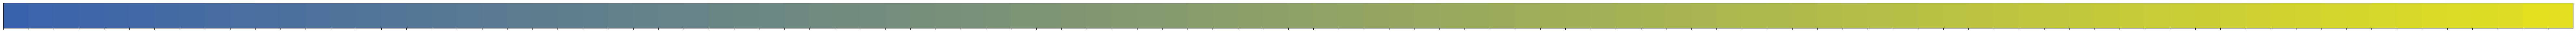

In [72]:
# Color by score
max_score_color = '#E3E020'
min_score_color = '#3962AD'
# create color scheme between
score_color_ls = make_gradient_color_scheme(101, # so goes 0 to 100
                                             [min_score_color,max_score_color])  
# remove every 6 elements to shorten list closer to 100
score_color_ls = [x for x in score_color_ls if x not in score_color_ls[::5]]
score_color_ls[100] = max_score_color
score_color_ls[0] = min_score_color

sns.palplot(score_color_ls)


# Plot Precision-Recall Curves


new list length is: 52


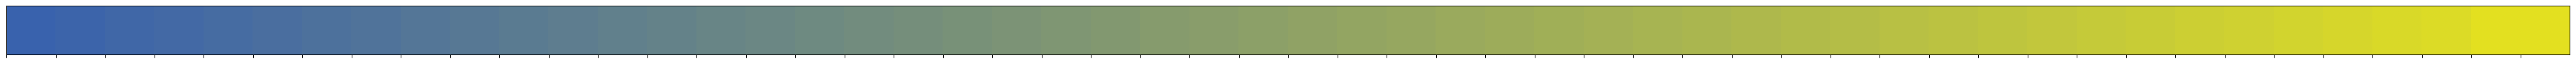

In [73]:
# make updated color scaling for ROC curves (since now 0.5-1.0 rather than 0-100)
max_score_color = '#E3E020'
min_score_color = '#3962AD'
# create color scheme between
prc_score_color_ls = make_gradient_color_scheme(51, 
                                             [min_score_color,max_score_color])  
prc_score_color_ls[50] = max_score_color
prc_score_color_ls[0] = min_score_color

print("new list length is:",len(prc_score_color_ls))
sns.palplot(prc_score_color_ls)



Figures saved to:
 p-r_curves_random_forest_k-fold_crossvalidation.svg 
 p-r_curves_random_forest_final.svg


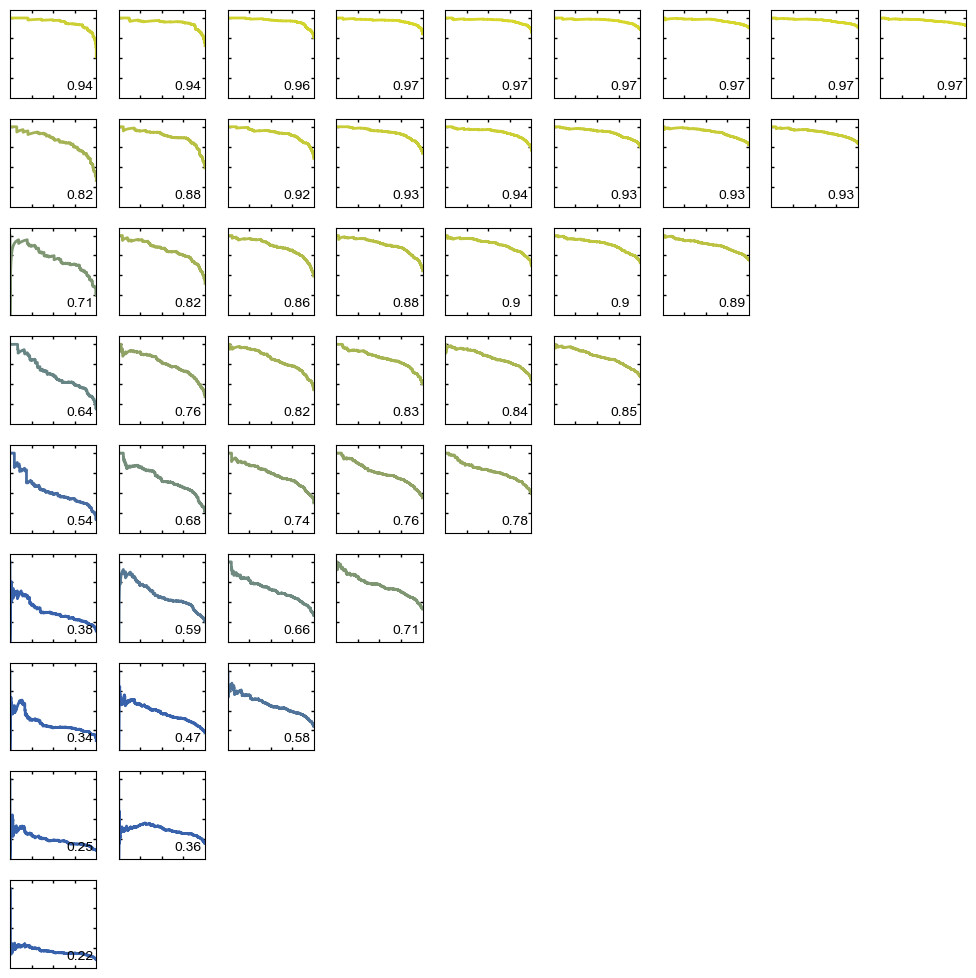

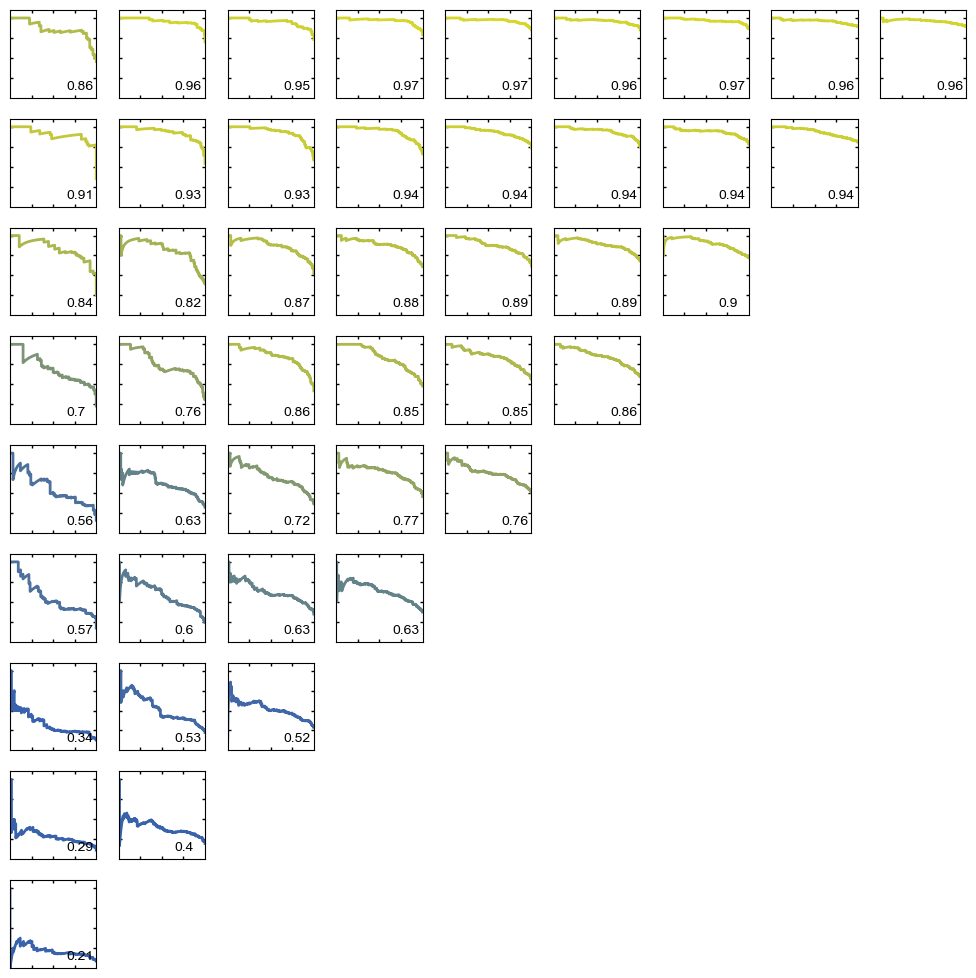

In [38]:
# # ** CONFIGURE FONTS **
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import rc
font_style = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14,
        'style'  : 'normal'}

matplotlib.rc('font', **font_style)
matplotlib.rc('text', usetex=False) # updates fonts in text of plot

# dictionary of locations in plots based on cutoffs
#   x across y going down
plotting_dict_efficient =   {0: 6.0, 1: 13.9, 2: 19.5, 
                             3: 25.0, 4: 30.1, 5: 36.3, 
                             6: 42.5, 7: 48.7, 8: 56.9}

plotting_dict_inefficient = {8: 6.0, 7: 13.9, 6: 19.5, 
                             5: 25.0, 4: 30.1, 3: 36.3, 
                             2: 42.5, 1: 48.7, 0: 56.9}


# P-R curves K-fold cross-validation
fig1, axs1 = plt.subplots(9, 9)
fig1.set_size_inches(w = 10, h = 10)

# P-R curves Final
fig2, axs2 = plt.subplots(9, 9)
fig2.set_size_inches(w = 10, h = 10)

    
for y_coord in range(9):
    for x_coord in range(9):
        # get appropriate cutoff combination from co_combos and colname_ls
        e_co = plotting_dict_efficient[x_coord]
        i_co = plotting_dict_inefficient[y_coord]

        co_name = 'f_co_'+str(int(np.round(e_co,0)))+'%__nf_co_'+str(int(np.round(i_co,0)))+'%'
        
        if not co_name in colname_ls:
            # drop axes that aren't used
            axis = axs1[y_coord,x_coord]
            axis.remove()
            axis = axs2[y_coord,x_coord]
            axis.remove()
        else:
            combo_index = colname_ls.index(co_name) # use combo_index to search co_combos and colname_ls (along with model output lists)
            # plot for each figure
            axis = axs1[y_coord,x_coord] # must go y before x
            # get roc score
            prc_score = np.round(avg_prcroc_kflds[combo_index],2) 
                
            prc_score_col = int(100*(prc_score))-50
            if prc_score_col < 0:
                prc_score_col = 0
                
            lines = axis.plot(
                avg_prs_kflds[combo_index][0], # recall --> x
                avg_prs_kflds[combo_index][1], # precision --> y 
                linewidth = 2,
                color = prc_score_color_ls[prc_score_col]
                #color=score_color_ls[avg_aucpr_adj_kflds_norm[combo_index]]
            )
            # Set axes to start/end where desired
            axis.set_xlim(0,1)
            axis.set_ylim(0,1.1)
            # Format Axis - remove axis ticks
            axis.tick_params(reset = True, which='major',labelsize=12,length=2.5, width = 1, color='black',direction = 'in',left = True,labelleft = False,right= True,labelright = False,bottom = True,labelbottom = False,top= True, labeltop = False,)
            axis.set_yticks(ticks=[0.25,0.5,0.75,1.0])
            axis.set_xticks(ticks=[0.25,0.5,0.75])
            axis.set_yticklabels([])
            axis.set_xticklabels([])
            # Add Text (PRAUC/PRAUCadj/normalized PRAUCadf)
            # if avg_aucpr_adj_kflds_norm[combo_index] < 10: # single digit score
            #     x_score_posn = 0.8
            # elif avg_aucpr_adj_kflds_norm[combo_index] < 100: # double digit score
            #     x_score_posn = 0.7
            # else: # triple digit score (100)
            #     x_score_posn = 0.6
            # axis.text(x = x_score_posn, y = 0.1, 
            #           s = (str(np.round(avg_aucpr_adj_kflds_norm[combo_index],3))),
            #           fontsize=10,
            #          )
            
            axis.text(x = 0.65, y = 0.1, 
                      s = str(np.round(prc_score,2) ),
                      fontsize=10,
                     )

            # plot for each figure
            axis = axs2[y_coord,x_coord] # must go y before x
            prc_score_final = np.round(prcroc_finals[combo_index],2) 
            
            prc_score_final_col = int(100*(prc_score_final))-50
            if prc_score_final_col < 0:
                prc_score_final_col = 0


            lines = axis.plot(  
                prs_final[combo_index][0], # recall --> x
                prs_final[combo_index][1], # precision --> y
                linewidth = 2,
                color = prc_score_color_ls[prc_score_final_col]
                #color=score_color_ls[aucpr_adj_finals_norm[combo_index]]
            )
            # Set axes to start/end where desired
            axis.set_xlim(0,1)
            axis.set_ylim(0,1.1)
            # Format Axis - remove axis ticks
            axis.tick_params(reset = True, which='major',labelsize=12,length=2.5, width = 1, color='black',direction = 'in',left = True,labelleft = False,right= True,labelright = False,bottom = True,labelbottom = False,top= True, labeltop = False,)
            axis.set_yticks(ticks=[0.25,0.5,0.75,1.0])
            axis.set_xticks(ticks=[0.25,0.5,0.75])
            axis.set_yticklabels([])
            axis.set_xticklabels([])
            # Add Text (PRAUC/PRAUCadj/normalized PRAUCadf)
            # if aucpr_adj_finals_norm[combo_index] < 10: # single digit score
            #     x_score_posn = 0.8
            # elif aucpr_adj_finals_norm[combo_index] < 100: # double digit score
            #     x_score_posn = 0.7
            # else: # triple digit score (100)
            #     x_score_posn = 0.6
            # axis.text(x = x_score_posn, y = 0.3, 
            #           s = str(np.round(avg_aucpr_adj_kflds_norm[combo_index],3)),
            #           fontsize=10,
            #          )
            axis.text(x = 0.65, y = 0.1, 
                      s = str(prc_score_final),
                      fontsize=10,
                     )
                
# ** SAVE FIGURES **
plt.rcParams['svg.fonttype'] = 'none' # exports text as strings rather than vector paths (images)
fig1.tight_layout()
fig2.tight_layout()
fnm1 = ('p-r_curves'+'_random_forest'+'_k-fold_crossvalidation'+'.svg')
fnm2 = ('p-r_curves'+'_random_forest'+'_final'+'.svg')
fig1.savefig(outdir_plot+fnm1,format='svg',transparent=True)
fig2.savefig(outdir_plot+fnm2,format='svg',transparent=True)
print('Figures saved to:\n',fnm1,"\n",fnm2)            






# Plot Contingency Tables 
**NOTE**: this code make take ***a few minutes to run***

Figures saved to:
 confusion-matrices_random_forest_k-fold_crossvalidation.svg 
 confusion-matrices_random_forest_final.svg


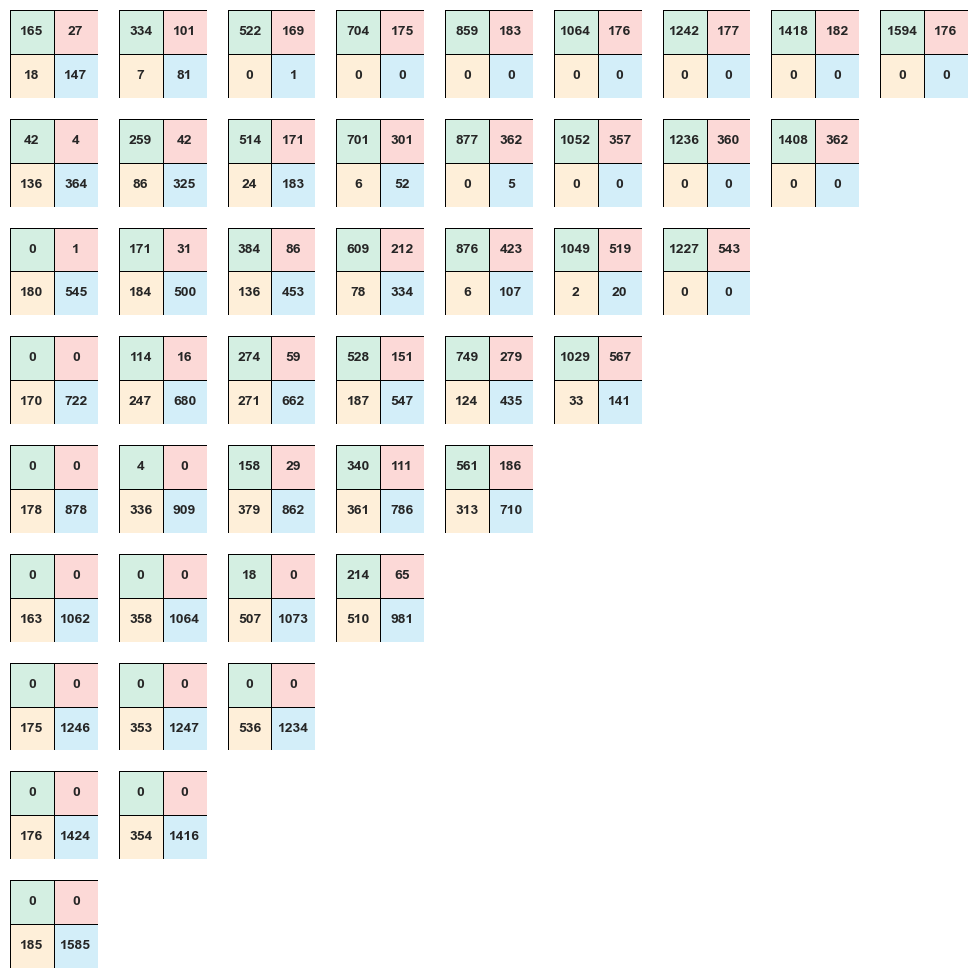

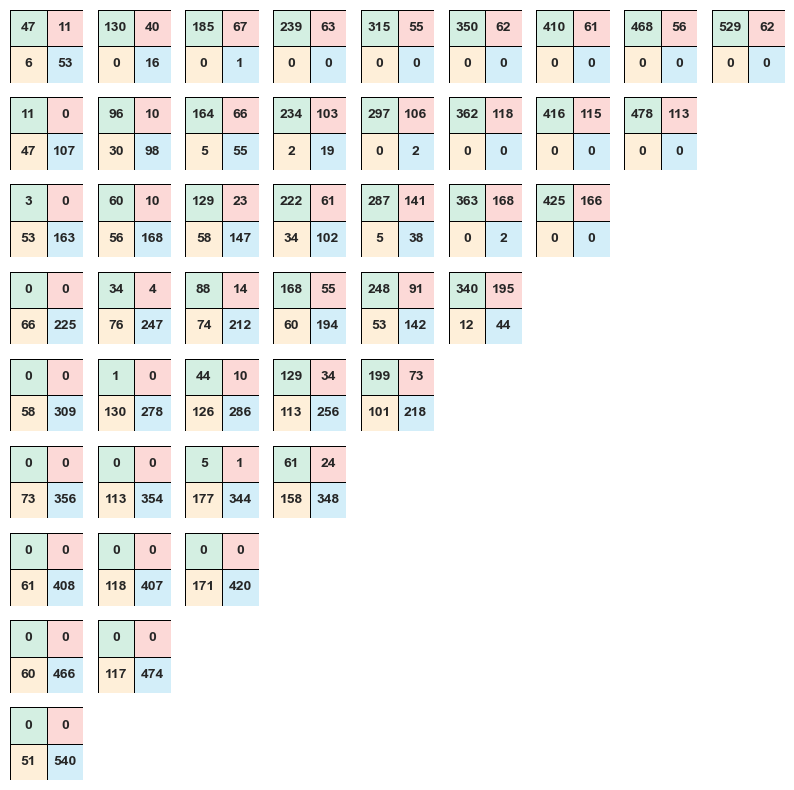

In [39]:
# Plot Contingency Tables

# Make color map for Contingency Tables 
from matplotlib.colors import LinearSegmentedColormap
conf_mtx_color_ls = ['#D4EFE2','#FCD9D7','#FEEFD9','#D3EEF9']
#sns.palplot(conf_mtx_color_ls)
# convert HEX color to RGB
conf_mtx_color_ls_asRGB = []
for c in conf_mtx_color_ls:
    hx = c.replace("#",'')
    rgb = tuple(int(hx[i:i+2], 16) for i in (0, 2, 4))
    conf_mtx_color_ls_asRGB.append(rgb)

# SCALE: convert RBG values to 0-1 scale (divide by 255)
scaled_rgb_compiled = []
for c in conf_mtx_color_ls_asRGB:
    scaled_rgb = []
    for i in range(len(c)):
        scaled_rgb.append(c[i]/255)# replace 1 with value
    scaled_rgb_compiled.append(tuple(scaled_rgb))
    
# tuple(scaled_rgb_compiled)
cmap_conf_mtxs = LinearSegmentedColormap.from_list('conf_matrix_color_map', conf_mtx_color_ls_asRGB, N=4)


# # ** CONFIGURE FONTS **
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import rc
font_style = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14,
        'style'  : 'normal'}

matplotlib.rc('font', **font_style)
matplotlib.rc('text', usetex=False) # updates fonts in text of plot

# dictionary of locations in plots based on cutoffs
#   x across y going down
plotting_dict_efficient =   {0: 6.0, 1: 13.9, 2: 19.5, 
                             3: 25.0, 4: 30.1, 5: 36.3, 
                             6: 42.5, 7: 48.7, 8: 56.9}

plotting_dict_inefficient = {8: 6.0, 7: 13.9, 6: 19.5, 
                             5: 25.0, 4: 30.1, 3: 36.3, 
                             2: 42.5, 1: 48.7, 0: 56.9}


# Contingency Tables K-fold cross-validation
fig1, axs1 = plt.subplots(9, 9)
fig1.set_size_inches(w = 10, h = 10)

# Contingency Tables Final
fig2, axs2 = plt.subplots(9, 9)
fig2.set_size_inches(w = 10, h = 10)

    
for y_coord in range(9):
    for x_coord in range(9):
        # get appropriate cutoff combination from co_combos and colname_ls
        e_co = plotting_dict_efficient[x_coord]
        i_co = plotting_dict_inefficient[y_coord]

        co_name = 'f_co_'+str(int(np.round(e_co,0)))+'%__nf_co_'+str(int(np.round(i_co,0)))+'%'
        
        if not co_name in colname_ls:
            # drop axes that aren't used
            axis = axs1[y_coord,x_coord]
            axis.remove()
            axis = axs2[y_coord,x_coord]
            axis.remove()
        else:
            combo_index = colname_ls.index(co_name) # use combo_index to search co_combos and colname_ls (along with model output lists)
            # plot for each figure
            axis = axs1[y_coord,x_coord] # must go y before x
            
            # Remove ticks from table
            plt.rcParams['xtick.bottom'] = False
            plt.rcParams['ytick.left'] = False
            sns.heatmap(
                    avg_conf_mtx_kflds[combo_index], # this is the confusion matrix (same as contingency table)
                    xticklabels=[], yticklabels=[],
                    annot=True,# MUST BE TRUE FOR NUMBERS TO SHOW UP
                    fmt='g',# Disables scientific notation
                    cbar=False, # Removes colorbar
                    ax=axis, cmap=['white'],  linecolor='black',
                    annot_kws={"font":"Arial", "weight":'bold',"size":10},linewidths=0.5,
                   )
            # Color boxes 
            sns.heatmap(
                    [[1, 2], [3, 4]], # this is the confusion matrix (same as contingency table)
                    xticklabels=[], yticklabels=[],
                    annot=False,# MUST BE TRUE FOR NUMBERS TO SHOW UP
                    fmt='g',# Disables scientific notation
                    cbar=False, # Removes colorbar
                    ax=axis, 
                    cmap = LinearSegmentedColormap.from_list('conf_matrix_color_map', scaled_rgb_compiled, N=4),
                    linecolor='black',
                    annot_kws={"font":"Arial", "weight":'bold',"size":10},linewidths=0.5,
                   )

            # plot for each figure
            axis = axs2[y_coord,x_coord] # must go y before x
            
            # Remove ticks from table
            plt.rcParams['xtick.bottom'] = False
            plt.rcParams['ytick.left'] = False
            sns.heatmap(
                    conf_mtx_final[combo_index], # this is the confusion matrix (same as contingency table)
                    xticklabels=[], yticklabels=[],
                    annot=True,# MUST BE TRUE FOR NUMBERS TO SHOW UP
                    fmt='g',# Disables scientific notation
                    cbar=False, # Removes colorbar
                    ax=axis, cmap=['white'],  linecolor='black',
                    annot_kws={"font":"Arial", "weight":'bold',"size":10},linewidths=0.5,
                   )
            # Color boxes 
            sns.heatmap(
                    [[1, 2], [3, 4]], # this is the confusion matrix (same as contingency table)
                    xticklabels=[], yticklabels=[],
                    annot=False,# MUST BE TRUE FOR NUMBERS TO SHOW UP
                    fmt='g',# Disables scientific notation
                    cbar=False, # Removes colorbar
                    ax=axis, 
                    cmap = LinearSegmentedColormap.from_list('conf_matrix_color_map', scaled_rgb_compiled, N=4),
                    linecolor='black',
                    annot_kws={"font":"Arial", "weight":'bold',"size":10},linewidths=0.5,
                   )
            
                
# ** SAVE FIGURES **
plt.rcParams['svg.fonttype'] = 'none' # exports text as strings rather than vector paths (images)
fig1.tight_layout()
fig1.tight_layout()
fnm1 = ('confusion-matrices'+'_random_forest'+'_k-fold_crossvalidation'+'.svg')
fnm2 = ('confusion-matrices'+'_random_forest'+'_final'+'.svg')
fig1.savefig(outdir_plot+fnm1,format='svg',transparent=True)
fig2.savefig(outdir_plot+fnm2,format='svg',transparent=True)
print('Figures saved to:\n',fnm1,"\n",fnm2)            
    


    


# Plot ROC Cruves

new list length is: 52


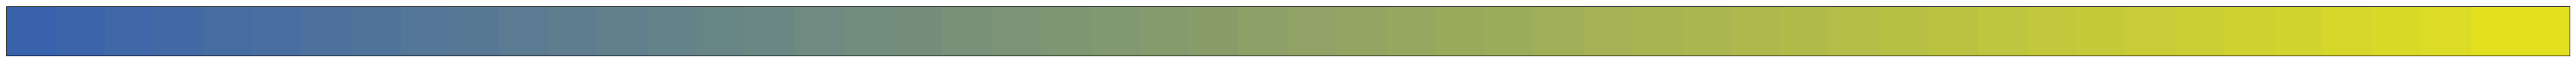

In [40]:
# make updated color scaling for ROC curves (since now 0.5-1.0 rather than 0-100)
max_score_color = '#E3E020'
min_score_color = '#3962AD'
# create color scheme between
roc_score_color_ls = make_gradient_color_scheme(51, 
                                             [min_score_color,max_score_color])  
roc_score_color_ls[50] = max_score_color
roc_score_color_ls[0] = min_score_color

print("new list length is:",len(roc_score_color_ls))
sns.palplot(roc_score_color_ls)



Figures saved to:
 roc_curves_random_forest_k-fold_crossvalidation.svg 
 roc_curves_random_forest_final.svg


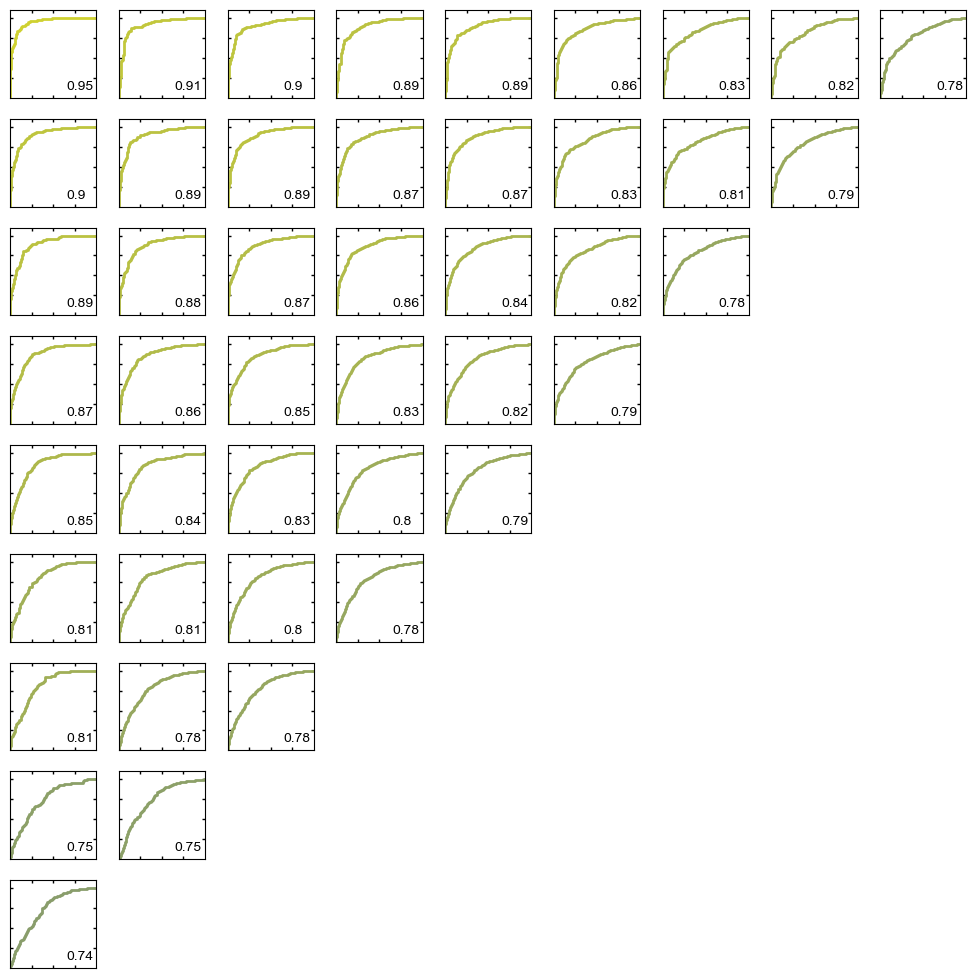

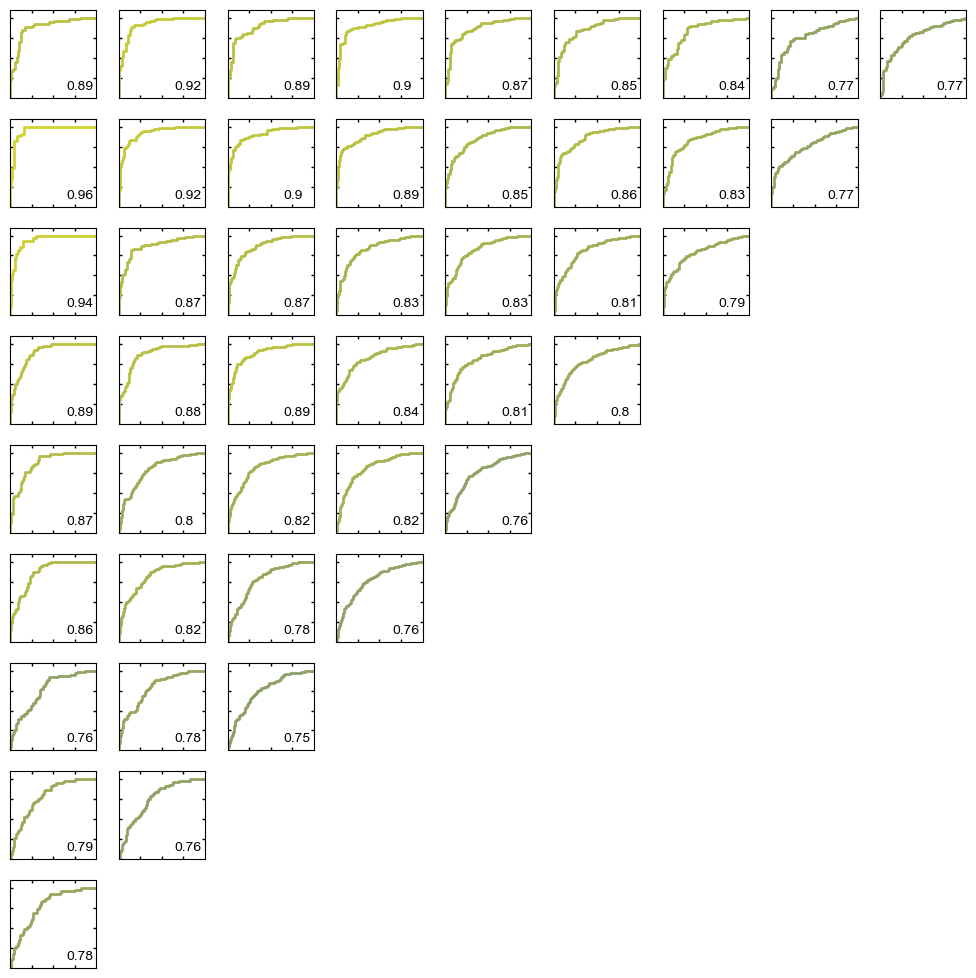

In [41]:
# Plot ROC Curves

# # ** CONFIGURE FONTS **
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
from matplotlib import rc
font_style = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14,
        'style'  : 'normal'}

matplotlib.rc('font', **font_style)
matplotlib.rc('text', usetex=False) # updates fonts in text of plot

# dictionary of locations in plots based on cutoffs
#   x across y going down
plotting_dict_efficient =   {0: 6.0, 1: 13.9, 2: 19.5, 
                             3: 25.0, 4: 30.1, 5: 36.3, 
                             6: 42.5, 7: 48.7, 8: 56.9}

plotting_dict_inefficient = {8: 6.0, 7: 13.9, 6: 19.5, 
                             5: 25.0, 4: 30.1, 3: 36.3, 
                             2: 42.5, 1: 48.7, 0: 56.9}


# P-R curves K-fold cross-validation
fig1, axs1 = plt.subplots(9, 9)
fig1.set_size_inches(w = 10, h = 10)

# P-R curves Final
fig2, axs2 = plt.subplots(9, 9)
fig2.set_size_inches(w = 10, h = 10)

    
for y_coord in range(9):
    for x_coord in range(9):
        # get appropriate cutoff combination from co_combos and colname_ls
        e_co = plotting_dict_efficient[x_coord]
        i_co = plotting_dict_inefficient[y_coord]

        co_name = 'f_co_'+str(int(np.round(e_co,0)))+'%__nf_co_'+str(int(np.round(i_co,0)))+'%'
        
        if not co_name in colname_ls:
            # drop axes that aren't used
            axis = axs1[y_coord,x_coord]
            axis.remove()
            axis = axs2[y_coord,x_coord]
            axis.remove()
        else:
            combo_index = colname_ls.index(co_name) # use combo_index to search co_combos and colname_ls (along with model output lists)
            # plot for each figure
            axis = axs1[y_coord,x_coord] # must go y before x
            # get roc score
            roc_score = np.round(avg_aucroc_kflds[combo_index],2) 
                
            roc_score_col = int(100*(roc_score))-50
            if roc_score_col < 0:
                roc_score_col = 0
                
            lines = axis.plot(
                avg_roc_kflds[combo_index][0], # fpr -> x
                avg_roc_kflds[combo_index][1], # tpr -> y
                linewidth = 2,
                color=roc_score_color_ls[roc_score_col]
            )
            # Set axes to start/end where desired
            axis.set_xlim(0,1)
            axis.set_ylim(0,1.1)
            # Format Axis - remove axis ticks
            axis.tick_params(reset = True, which='major',labelsize=12,length=2.5, width = 1, color='black',direction = 'in',left = True,labelleft = False,right= True,labelright = False,bottom = True,labelbottom = False,top= True, labeltop = False,)
            axis.set_yticks(ticks=[0.25,0.5,0.75,1.0])
            axis.set_xticks(ticks=[0.25,0.5,0.75])
            axis.set_yticklabels([])
            axis.set_xticklabels([])

            # Add Text (ROC Score)
            axis.text(x = 0.65, y = 0.1, 
                      s = str(np.round(roc_score,2) ),
                      fontsize=10,
                     )
            
            # plot for each figure
            axis = axs2[y_coord,x_coord] # must go y before x
                      
            roc_score_final = np.round(aucroc_finals[combo_index],2) 
            
            roc_score_final_col = int(100*(roc_score_final))-50
            if roc_score_final_col < 0:
                roc_score_final_col = 0
                
            lines = axis.plot(
                roc_final[combo_index][0], # fpr -> x
                roc_final[combo_index][1], # tpr -> y
                linewidth = 2,
                color=roc_score_color_ls[roc_score_final_col],
            )
            # Set axes to start/end where desired
            axis.set_xlim(0,1)
            axis.set_ylim(0,1.1)
            # Format Axis - remove axis ticks
            axis.tick_params(reset = True, which='major',labelsize=12,length=2.5, width = 1, color='black',direction = 'in',left = True,labelleft = False,right= True,labelright = False,bottom = True,labelbottom = False,top= True, labeltop = False,)
            axis.set_yticks(ticks=[0.25,0.5,0.75,1.0])
            axis.set_xticks(ticks=[0.25,0.5,0.75])
            axis.set_yticklabels([])
            axis.set_xticklabels([])
                      
            # Add Text (ROC Score)
            axis.text(x = 0.65, y = 0.1, 
                      s = str(roc_score_final),
                      fontsize=10,
                     )
                
                
# ** SAVE FIGURES **
plt.rcParams['svg.fonttype'] = 'none' # exports text as strings rather than vector paths (images)
fig1.tight_layout()
fig2.tight_layout()
fnm1 = ('roc_curves'+'_random_forest'+'_k-fold_crossvalidation'+'.svg')
fnm2 = ('roc_curves'+'_random_forest'+'_final'+'.svg')
fig1.savefig(outdir_plot+fnm1,format='svg',transparent=True)
fig2.savefig(outdir_plot+fnm2,format='svg',transparent=True)
print('Figures saved to:\n',fnm1,"\n",fnm2)





# Get metrics

In [75]:
len(f1_final)
for i in range(len(co_combos)):
    if colname_ls[i] == 'f_co_29%__nf_co_29%' or colname_ls[i] == 'f_co_29%__nf_co_29%':
        print(colname_ls[i])
        print('f1:',f1_final[i])
        print('auc:',aucroc_finals[i])
        print('prc:',prcroc_finals[i])

f_co_29%__nf_co_29%
f1: 0.0
auc: 0.6084567734985187
prc: 0.596398625084537


# Build Weight Matrix 
For selected threshold combination


In [154]:
# Extract Feature Preferences from selected final model
import pickle
# load selected in model
final_model_thresholds = 'f_co_52%__nf_co_52%' # Update this to selected Final Model thresholds

final_model_file = 'FINAL-MODEL_'+final_model_thresholds+'_rf'+'.sav'
clf = pickle.load(open(outdir_model+final_model_file, 'rb'))
print("loading existing model:",final_model_file)
# Use ENTIRE dataset
X_test = df[df[final_model_thresholds+'_class'] != 'excluded']['encoded_19mer']
y_test = df[df[final_model_thresholds+'_class'] != 'excluded'][final_model_thresholds+'_class'].map(class_dict)     

# Evaluate Model (Classifier) on Test Set
y_score = clf.predict_proba(list(X_test))[:,1]
y_pred  = clf.predict(list(X_test))

df_score = pd.DataFrame({'actual':y_test,'predicted':y_pred,'prob':y_score,'encoded_19mer':X_test})
#display(df_score)


# Identify prediction classes (TP/TN/FN/FP) 
def get_prediction_class(x):
    if x['actual'] == 1: # is actually positive
        if x['predicted'] == 1: # correct prediction
            return "TP"
        else: # incorrectly predicted to be negative
            return "FN" 
    else: # is actually negative
        if x['predicted'] == 1: # incorrectly predicted to be positive
            return "FP"
        else: # correctly predicted to be negative
            return "TN"


df_score['pred_class'] = df_score[['actual','predicted']].apply(lambda x: get_prediction_class(x), axis =1)

# Compute weights - frequencies of each base at each position averaged over the entire prediction class
#        * frequencies are calculated from encoded sequence
# get encoded sequences with given prediction class (True Positives)
freq_TP_df = pd.DataFrame(list(df_score[df_score['pred_class'] == 'TP']['encoded_19mer'] ))
# compute average frequencies of encoded sequences across 20mer (80 total features - 4 base * 20 positions) for given prediction class
avg_TP = freq_TP_df.apply(lambda x: np.average(x))

# get encoded sequences with given prediction class (True Negatives)
freq_TN_df = pd.DataFrame(list(df_score[df_score['pred_class'] == 'TN']['encoded_19mer'] ))
# compute average frequencies of encoded sequences across 20mer (80 total features - 4 base * 20 positions) for given prediction class
avg_TN = freq_TN_df.apply(lambda x: np.average(x))

# get encoded sequences with given prediction class (False Positives)
freq_FP_df = pd.DataFrame(list(df_score[df_score['pred_class'] == 'FP']['encoded_19mer'] ))
# compute average frequencies of encoded sequences across 20mer (80 total features - 4 base * 20 positions) for given prediction class
avg_FP = freq_FP_df.apply(lambda x: np.average(x))

# get encoded sequences with given prediction class (False Negatives)
freq_FN_df = pd.DataFrame(list(df_score[df_score['pred_class'] == 'FN']['encoded_19mer'] ))
# compute average frequencies of encoded sequences across 20mer (80 total features - 4 base * 20 positions) for given prediction class
avg_FN = freq_FN_df.apply(lambda x: np.average(x))

# Sum weights across 20mer sequence for all 80 features (4 bases * 20 positions) 
#    False Negatives are incorrect predictions so multiply by -1
#    False Positives are incorrect predictions so multiply by -1
sum_weights = ((avg_TP) + (avg_TN) + (-1*avg_FP) + (-1*avg_FN))


# Convert to weight matrix - numbers are based on how the bases were encoded (see encode_sequence method above)
#      base_dict = {'A':[1,0,0,0],'U':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
a_imps = list(sum_weights[::4])
u_imps = list(sum_weights[1::4])
c_imps = list(sum_weights[2::4])
g_imps = list(sum_weights[3::4])

weight_matrix_proxy = pd.DataFrame({"A":a_imps,"U":u_imps,"C":c_imps,"G":g_imps,})

# Normalize weights
largest = max(max(weight_matrix_proxy['A']),max(weight_matrix_proxy['U']),max(weight_matrix_proxy['C']),max(weight_matrix_proxy['G']))
smallest = min(min(weight_matrix_proxy['A']),min(weight_matrix_proxy['U']),min(weight_matrix_proxy['C']),min(weight_matrix_proxy['G']))
if abs(smallest) > largest:
    norm_val = abs(smallest)
else:
    norm_val = largest
weight_matrix_proxy = weight_matrix_proxy.apply(lambda x: np.round((100*(x/norm_val)),0)).astype('int64')

# cutoff at 20
weight_matrix_proxy = weight_matrix_proxy.where((weight_matrix_proxy > 20) | ( weight_matrix_proxy < -20), 0)

display(weight_matrix_proxy.transpose())






loading existing model: FINAL-MODEL_f_co_52%__nf_co_52%_rf.sav


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
A,0,0,0,0,-21,0,0,0,24,32,0,32,0,-28,0,0,0,0,30
U,100,33,27,27,0,0,0,0,0,0,0,-26,27,51,0,0,0,42,0
C,-28,0,-32,-56,0,-26,0,23,0,0,21,0,-29,0,-33,0,0,0,-34
G,-65,0,0,32,30,0,0,0,-23,0,0,0,0,-27,0,0,0,-38,0


Figure saved to:
 weight_matrix_FINAL-MODEL_f_co_52%__nf_co_52%_rf.sav.svg


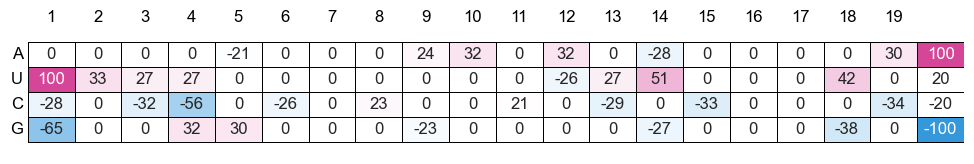

In [155]:
# Plot Weight Matrix
weight_matrix_to_plot = weight_matrix_proxy

# add extra row that will be deleted later just for coloring matrix
weight_matrix_to_plot = pd.concat((weight_matrix_to_plot,pd.DataFrame({"A":[100],"U":[20],"C":[-20],"G":[-100]}))) #weight_matrix_to_plot.append(pd.DataFrame({"A":[100],"U":[20],"C":[-20],"G":[-100]}))

weight_matrix_to_plot = weight_matrix_to_plot.transpose()

weight_matrix_to_plot.columns = [str(x) for x in list(range(1,20))]+['']

# plot the map
font = {'weight' : 'normal','size'   : 12, "family":'sans-serif',"sans-serif":'Arial'}
matplotlib.rc('font', **font)

positive_color ="#d54699"
negative_color =  "#3498db"

norm = matplotlib.colors.Normalize(-100,100)
colors = [[norm(-100), negative_color],
          [norm(-20), "white"],
          [norm(0), "white"],
          [norm( 20), "white"],
          [norm( 100), positive_color]]

cm = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=((5.5*1.8,1*1.8)))

ax = sns.heatmap(weight_matrix_to_plot,
                      annot=True,
                      cmap=cm,
                      linewidths=0.5,linecolor='black',fmt='g',cbar=False)
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis=u'both', which=u'both',length=0) # remove tick lines
ax.tick_params(rotation=0)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Create a Rectangle patch to hide last collumn
rect = matplotlib.patches.Rectangle((20.01,-2 ), 2, 50, edgecolor='none', facecolor='white',zorder=99)
ax.add_patch(rect)

# ** SAVE FIGURE **
plt.rcParams['svg.fonttype'] = 'none' # exports text as strings rather than vector paths (images)
fig.tight_layout()
fnm = ('weight_matrix_'+final_model_file+'.svg')
fig.savefig(outdir_plot+fnm,format='svg',transparent=True)
print('Figure saved to:\n',fnm)

